In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 200

from src.visualization import plot_histogram_with_stats

In [3]:
# reading the data
df = pd.read_csv('../data/RTAQI_update.csv')

In [4]:
# displaying the data
display(df.head(),df.tail(),df.sample(5))

,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2024-04-14 11:00:00,NH3,2.0,4.0,4.0
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",2024-04-14 11:00:00,SO2,9.0,14.0,12.0
2,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",2024-04-14 11:00:00,PM2.5,42.0,246.0,74.0
3,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",2024-04-14 11:00:00,PM10,46.0,156.0,74.0
4,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",2024-04-14 11:00:00,SO2,11.0,12.0,11.0


,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3228,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,PM2.5,78.0,103.0,91.0
3229,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,PM10,100.0,131.0,111.0
3230,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,CO,69.0,109.0,77.0
3231,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",2024-04-14 11:00:00,OZONE,11.0,86.0,29.0
3232,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",2024-04-14 11:00:00,PM10,72.0,131.0,102.0


,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
578,Uttar_Pradesh,Agra,"Sector-3B Avas Vikas Colony, Agra - UPPCB",2024-04-14 11:00:00,OZONE,2.0,8.0,4.0
2478,Uttar_Pradesh,Agra,"Sector-3B Avas Vikas Colony, Agra - UPPCB",2024-04-14 11:00:00,NO2,49.0,51.0,51.0
1650,Maharashtra,Mumbai,"Powai, Mumbai - MPCB",2024-04-14 11:00:00,SO2,31.0,42.0,35.0
1069,Odisha,Keonjhar,"Jagamohanpur, Keonjhar - OSPCB",2024-04-14 11:00:00,CO,13.0,79.0,35.0
2364,Punjab,Khanna,"Kalal Majra, Khanna - PPCB",2024-04-14 11:00:00,PM2.5,41.0,111.0,70.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          3233 non-null   object 
 1   city           3233 non-null   object 
 2   station        3233 non-null   object 
 3   last_update    3233 non-null   object 
 4   pollutant_id   3233 non-null   object 
 5   pollutant_min  3233 non-null   float64
 6   pollutant_max  3233 non-null   float64
 7   pollutant_avg  3233 non-null   float64
dtypes: float64(3), object(5)
memory usage: 202.2+ KB


In [6]:
df.describe()

,pollutant_min,pollutant_max,pollutant_avg
count,3233.000000,3233.000000,3233.000000
mean,23.538871,81.495185,42.171106
std,24.871403,91.543673,42.921555
min,1.000000,1.000000,1.000000
25%,6.000000,20.000000,12.000000
50%,15.965909,51.000000,29.000000
75%,34.000000,105.000000,58.000000
max,306.000000,500.000000,340.000000


# Visualizationm

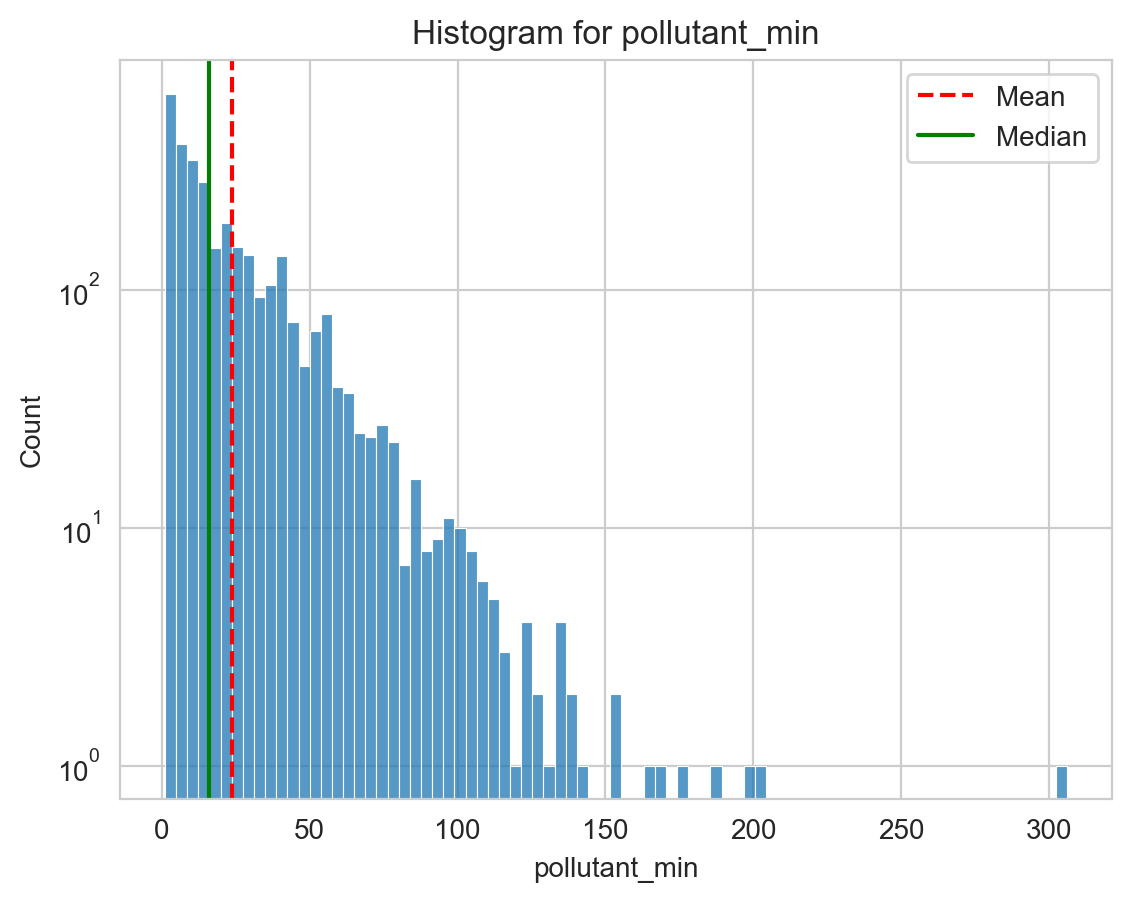

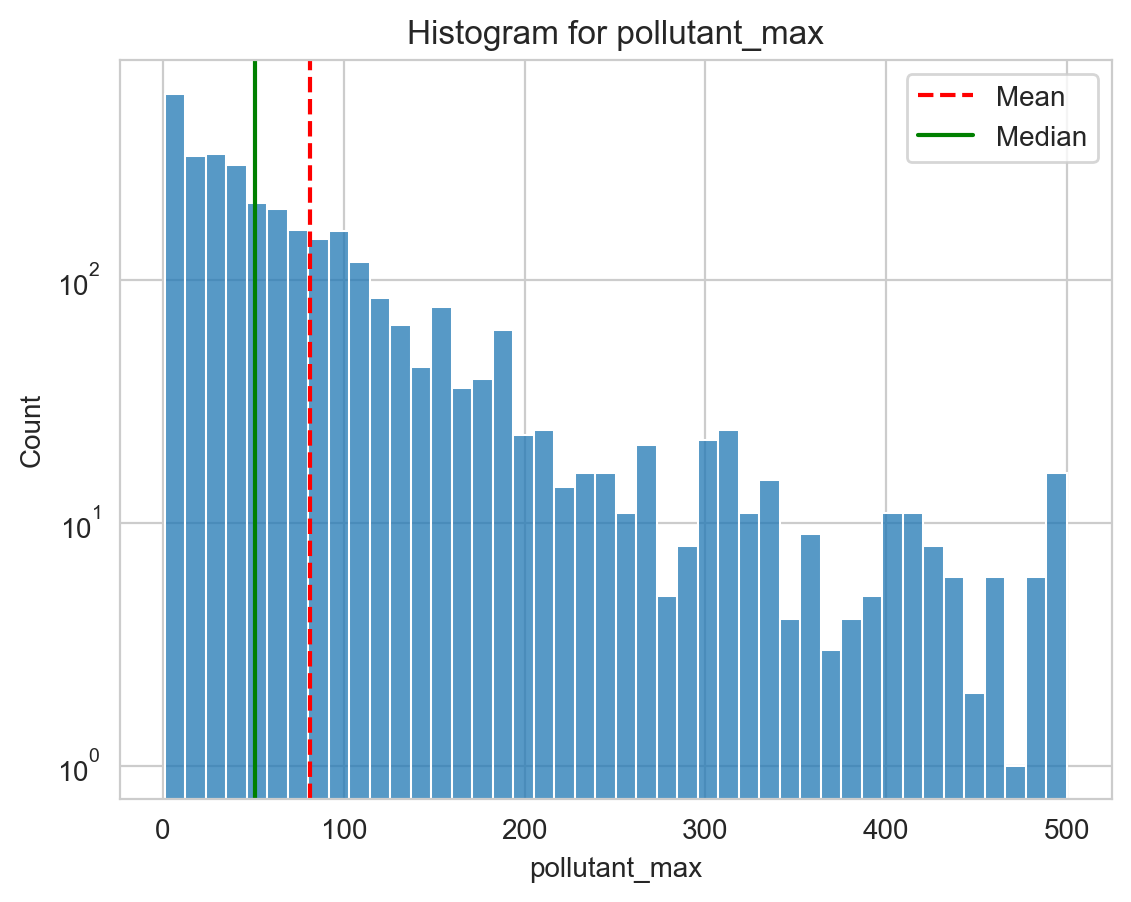

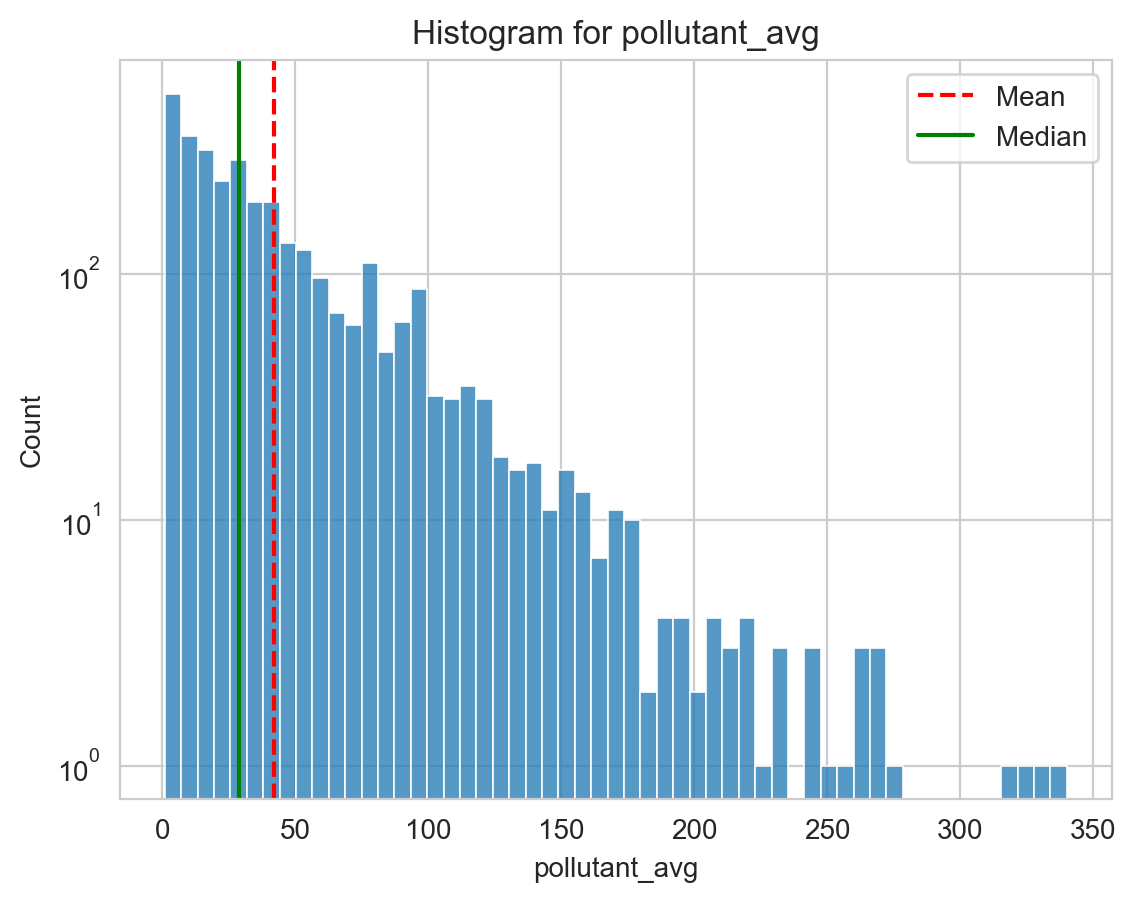

In [7]:
numerical_columns = df.describe().columns.to_list()

plot_histogram_with_stats(df, numerical_columns, yscale=True)

- We can see there is a left skew in all three fields i.e. min, max and average. 
- Left skew dominance explains that most of the data is concentrated towards the lower half of the data, meaning generally the AQI values are on the lower end
- Another thing to consider is the minimum and average AQI the mean does not cross 50 and in terms of the average AQI (aka mean lol) the mean and median are still under 100
- There can be potential outliers in the data that can suggest that at times the AQI values go above the average score hence resulting in bad air quality.

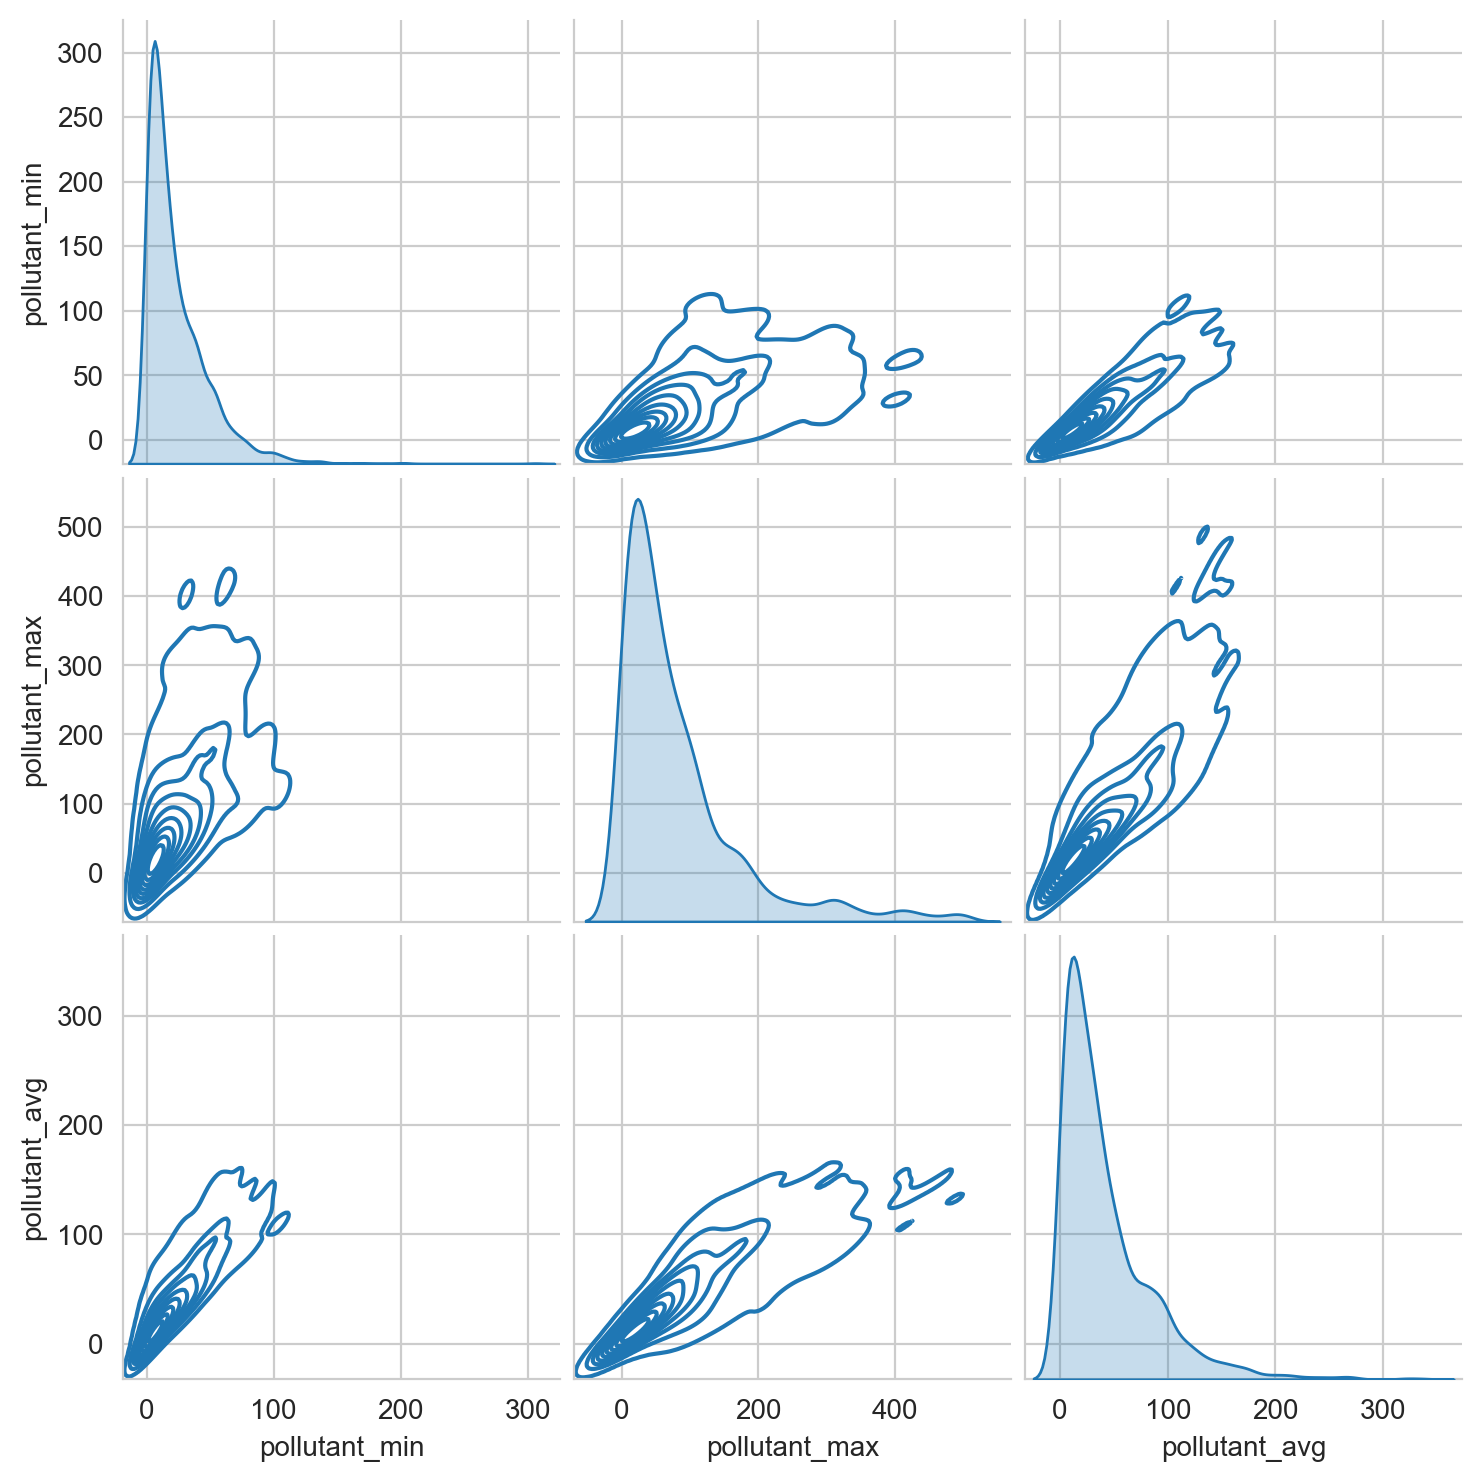

In [8]:
sns.pairplot(df, kind='kde')
plt.show()

Since of all of them are component of the same score, hence they show positive correlation with each other

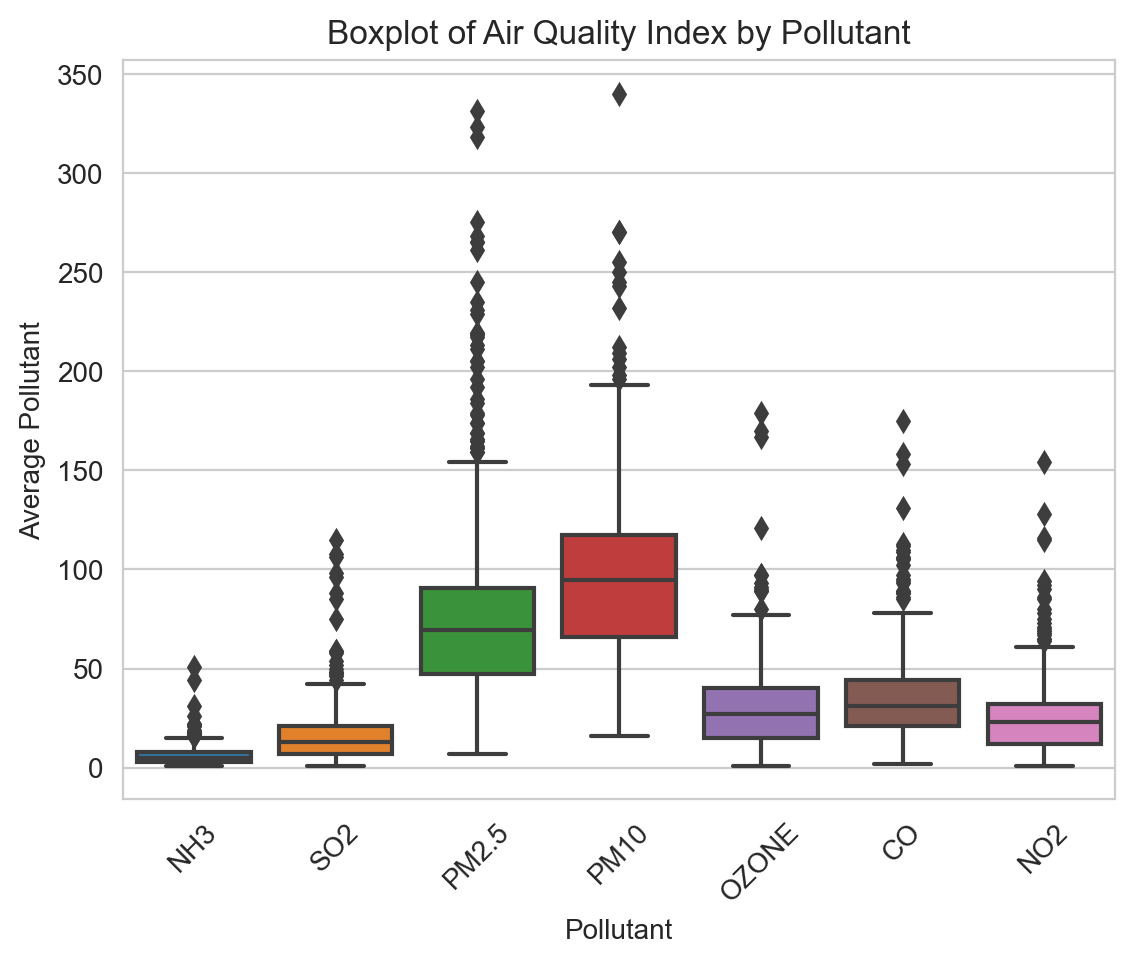

In [9]:
# Create a figure and axis objects using subplots
fig, ax = plt.subplots()

# Create a boxplot for each pollutant
sns.boxplot(x='pollutant_id', y='pollutant_avg', data=df, ax=ax)
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Pollutant')
plt.title('Boxplot of Air Quality Index by Pollutant')
# Show the plot
plt.show()

By just looking at this boxplot, we can get a lot of information regarding the spread of the data for each pollutant present
- NH3 has the least variation in the average, followed by SO2 
- PM10 and PM2.5 show the biggest spread on an average and the upper boundary is also really big with outlier values reaching 300
- Ozone, CO and NO2 are in the middle with all the datapoints being contained within 0 - 200 range including outliers

In [36]:
state_pollution

pollutant_id,CO,NH3,NO2,OZONE,PM10,PM2.5,SO2
state,,,,,,,
Andhra_Pradesh,9,7,7,9,9,9,9
Arunachal_Pradesh,1,0,1,1,1,1,1
Assam,8,7,8,8,7,8,8
Bihar,32,30,31,33,30,33,31
Chandigarh,3,3,3,3,3,3,3
Chhattisgarh,12,12,13,12,13,13,13
Delhi,39,31,39,38,38,38,31
Gujarat,12,12,14,13,14,14,13
Haryana,28,25,29,29,25,29,29


In [37]:
state_pollution.index

Index(['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura',
       'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal'],
      dtype='object', name='state')

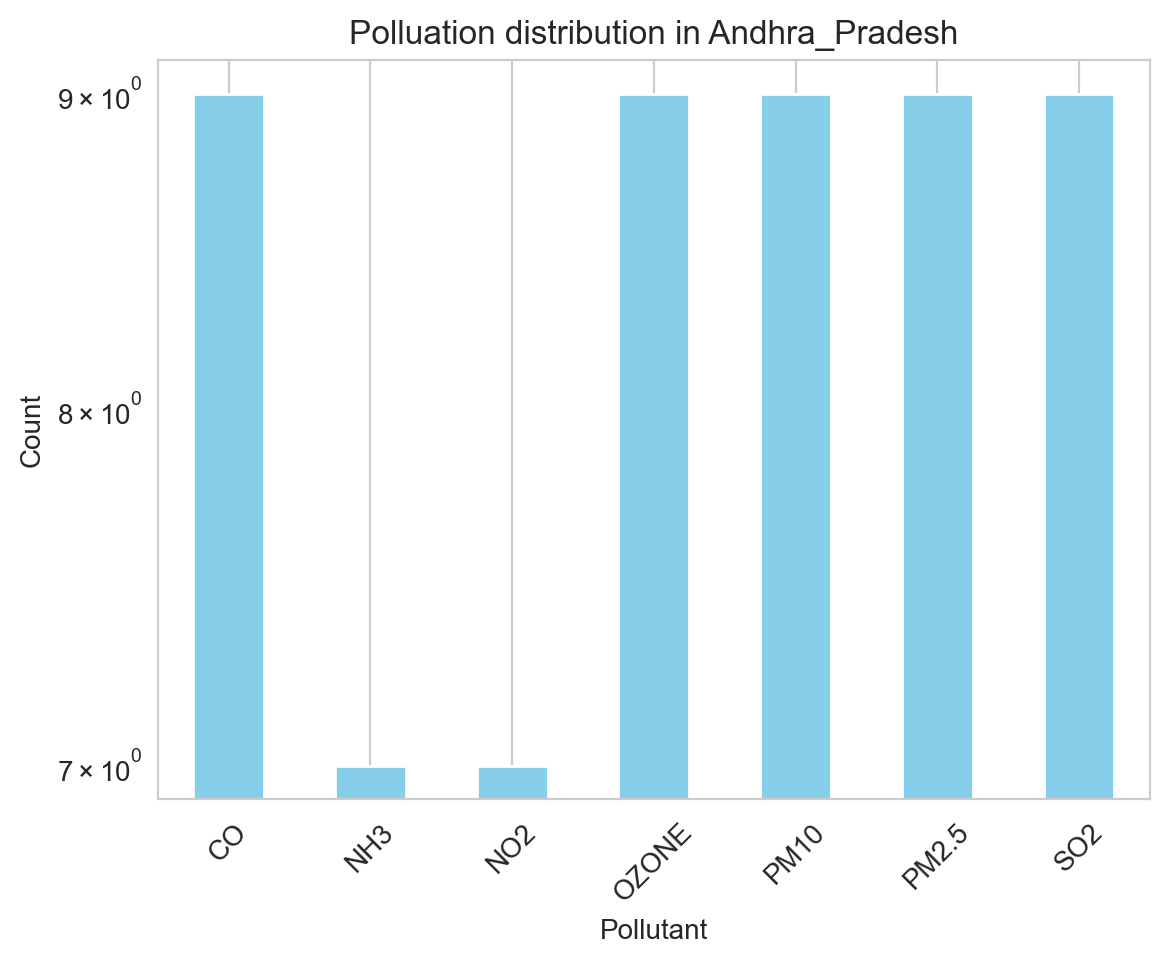

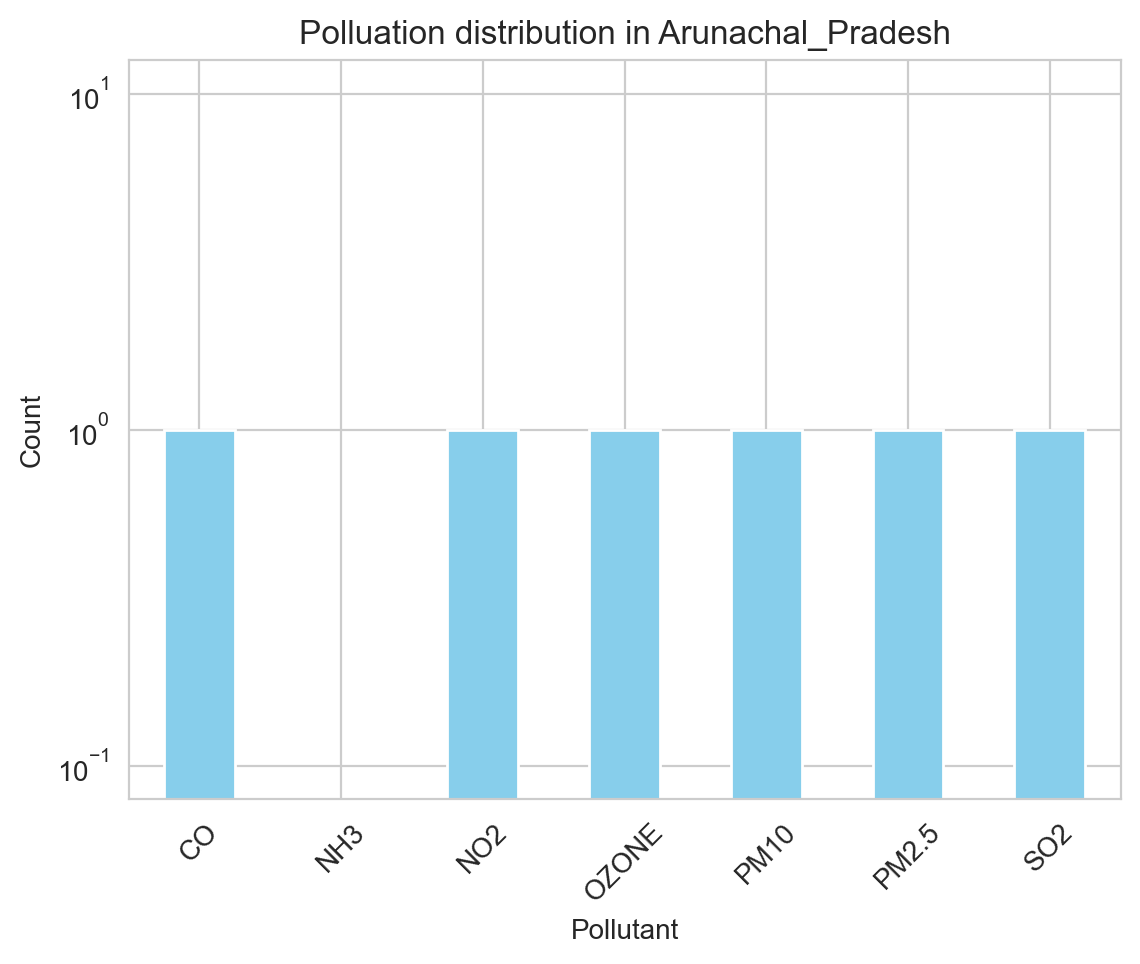

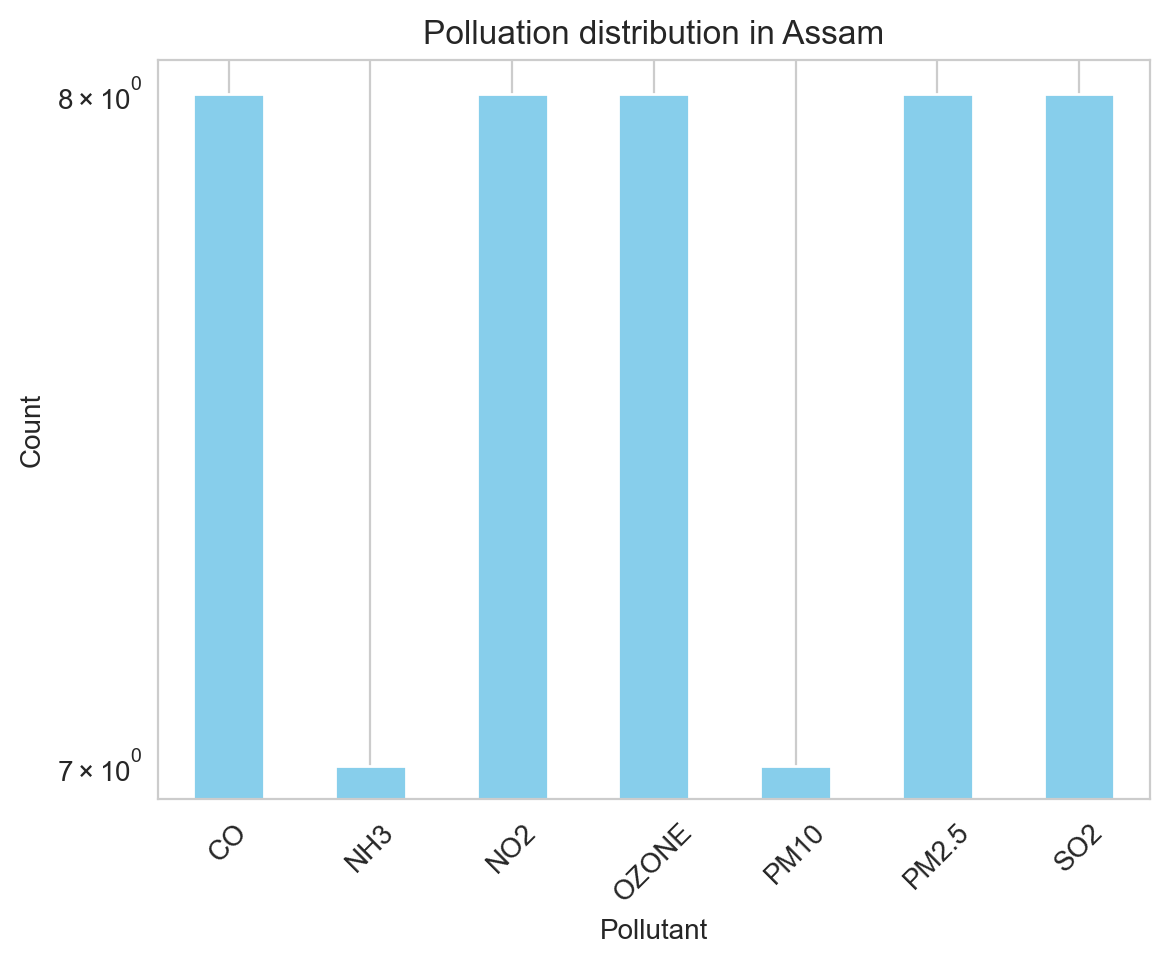

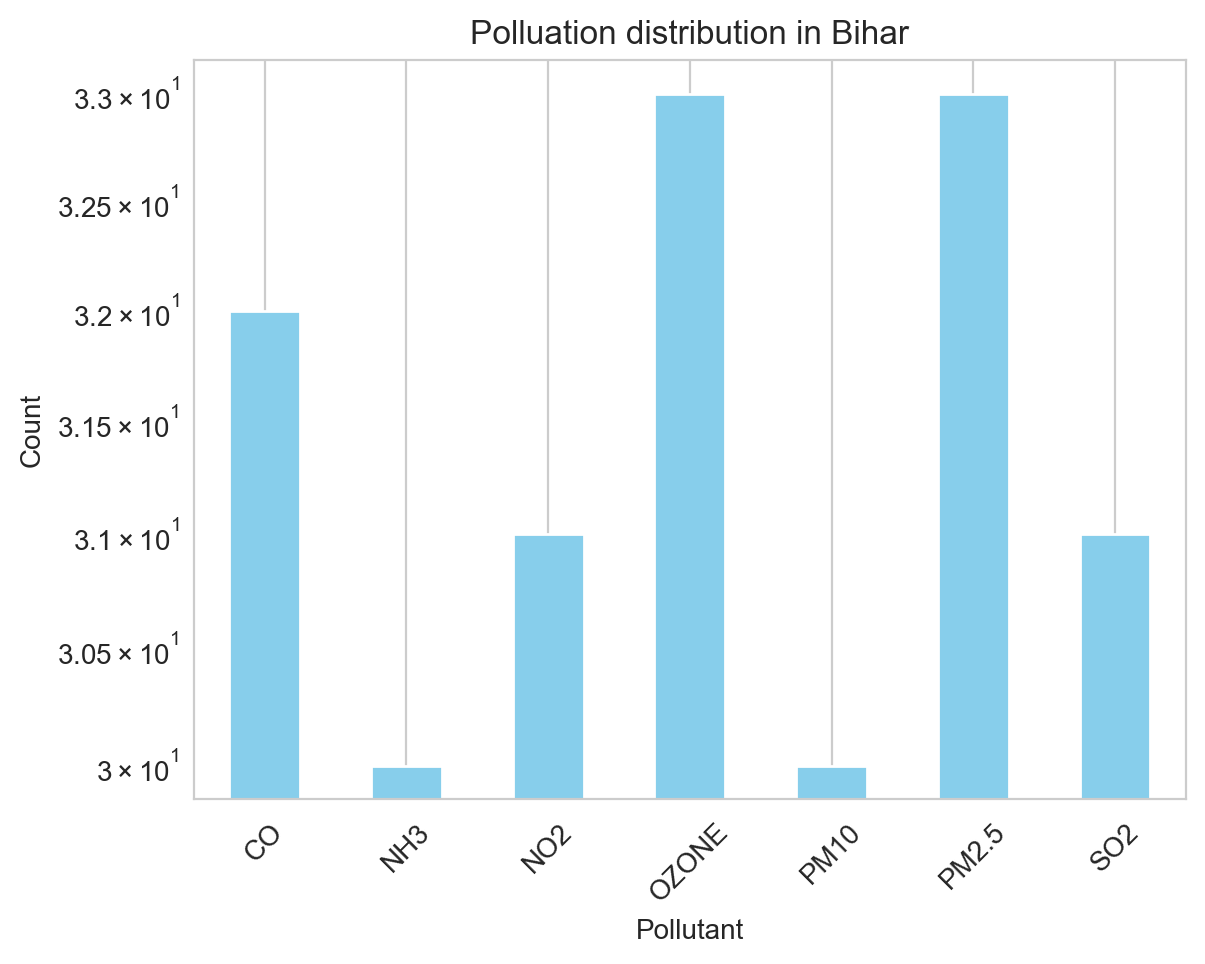

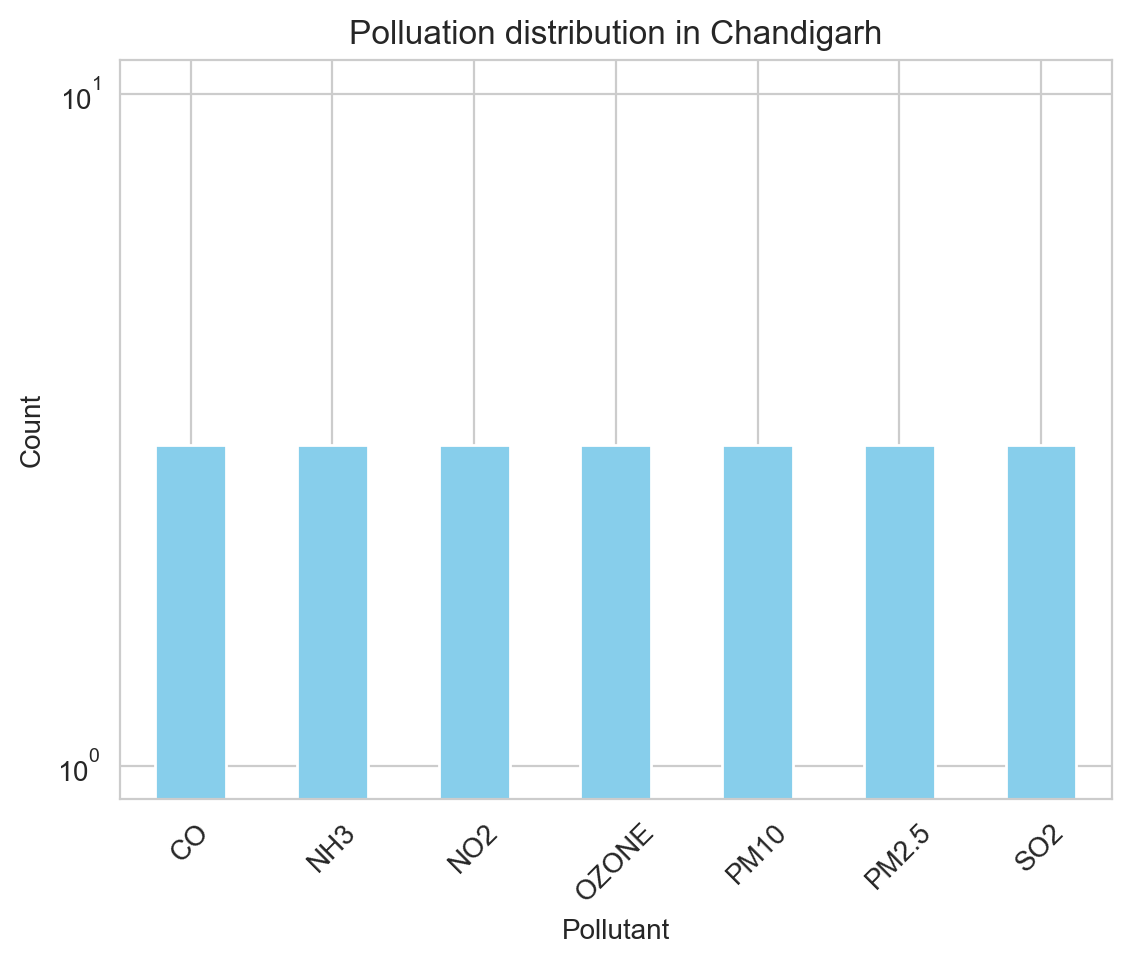

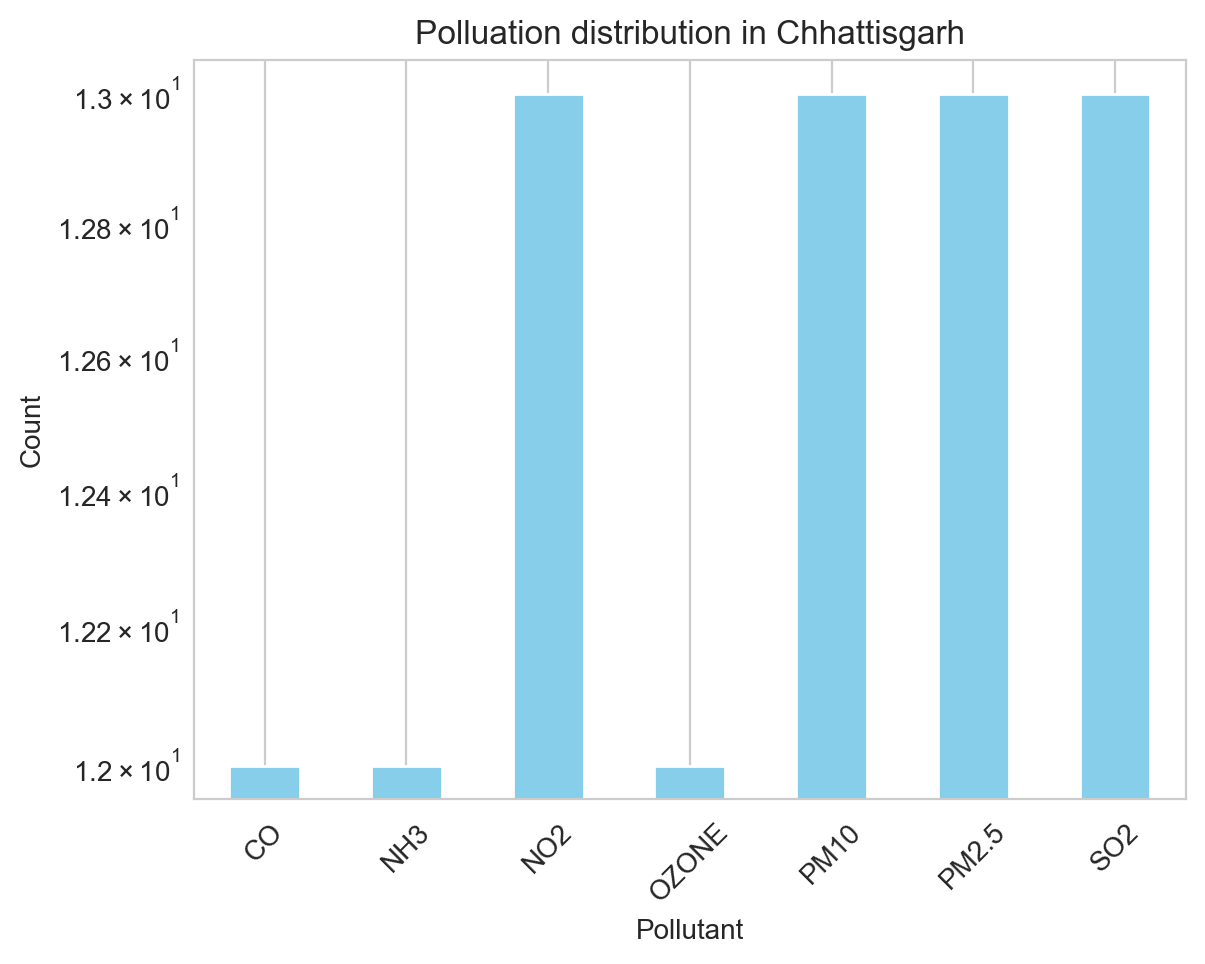

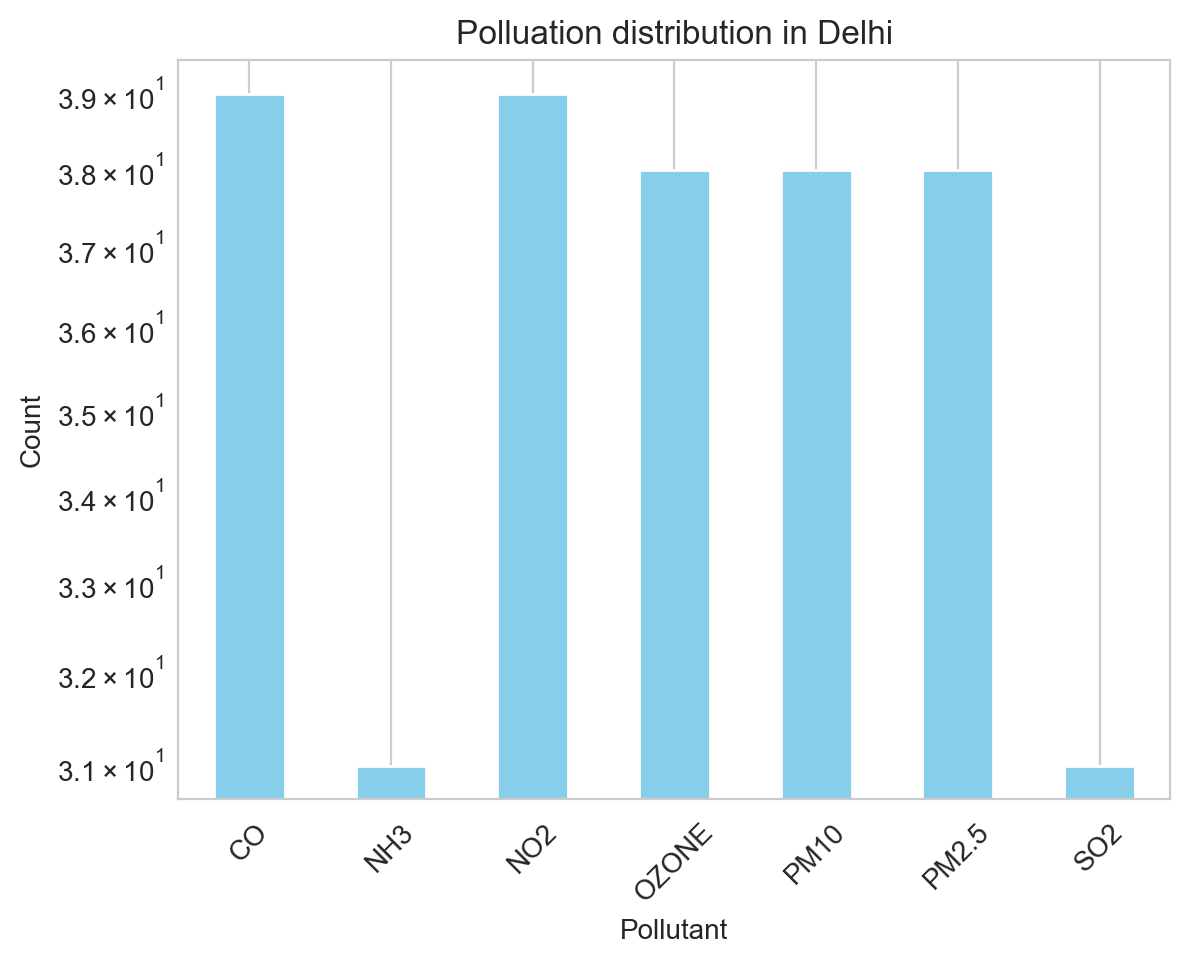

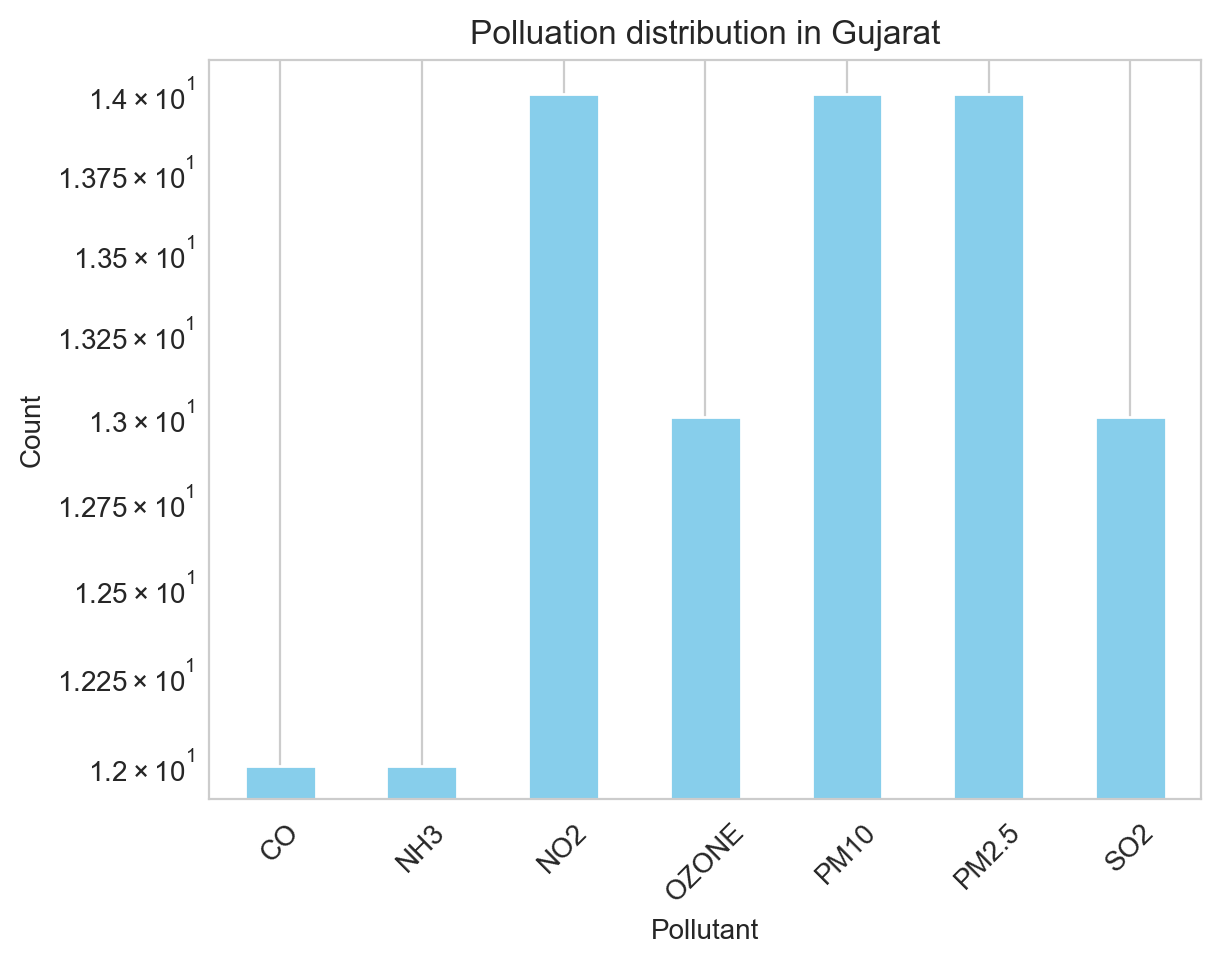

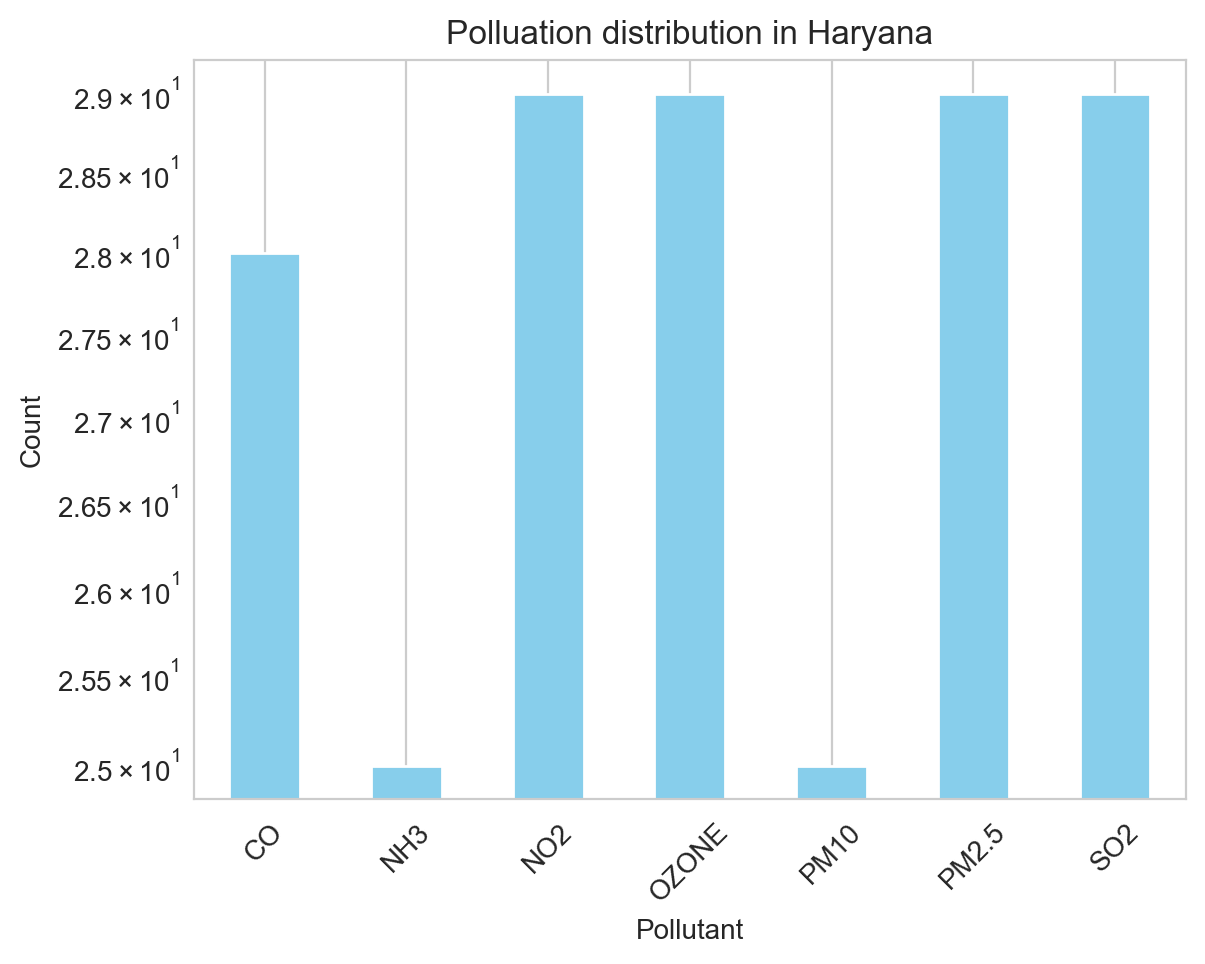

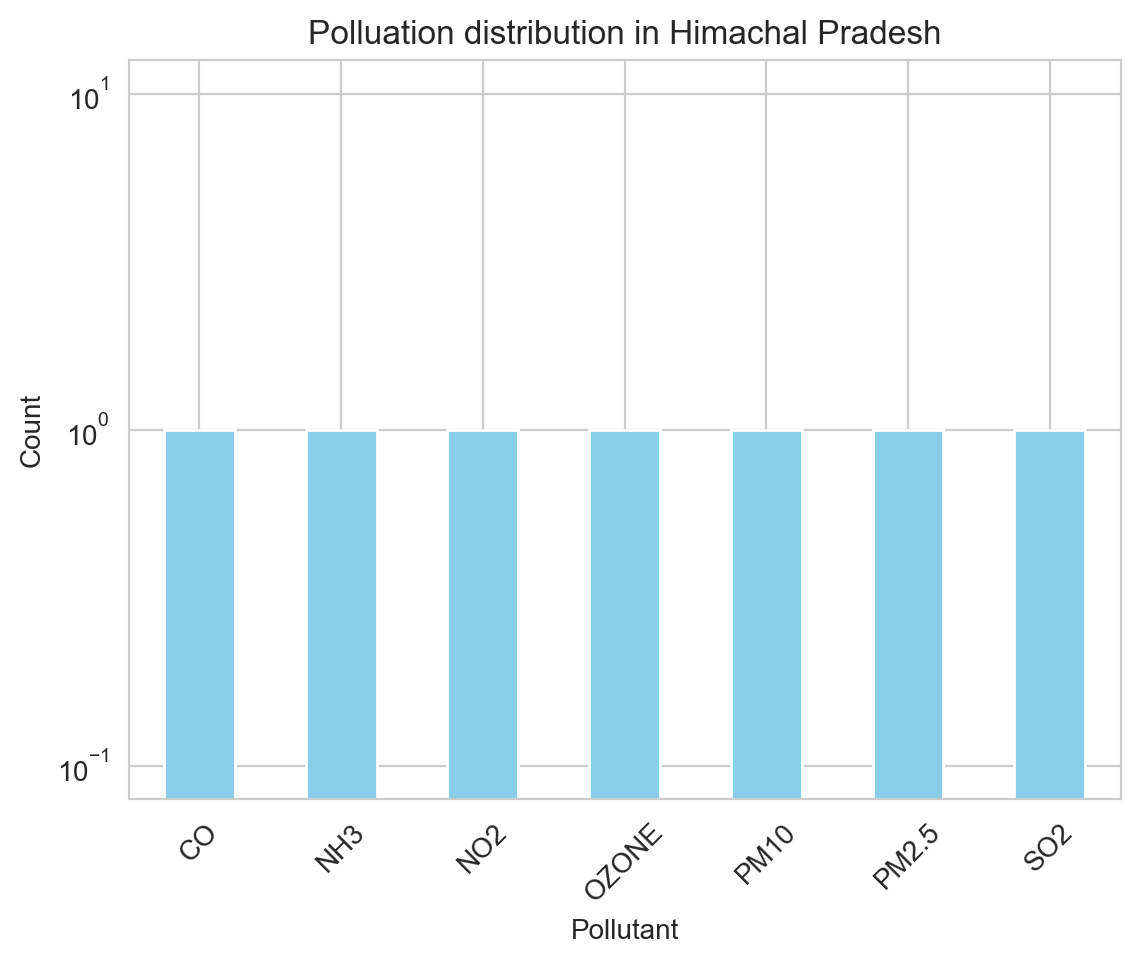

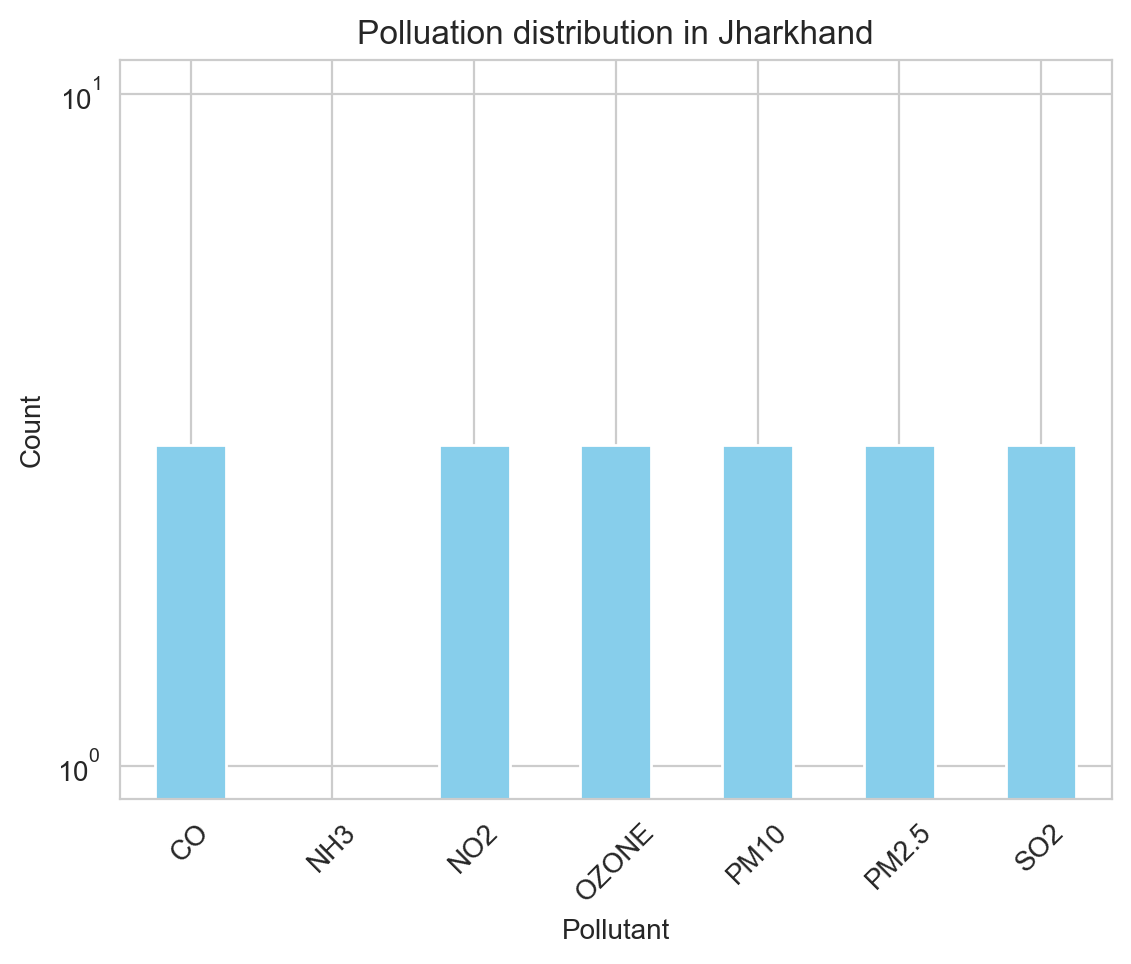

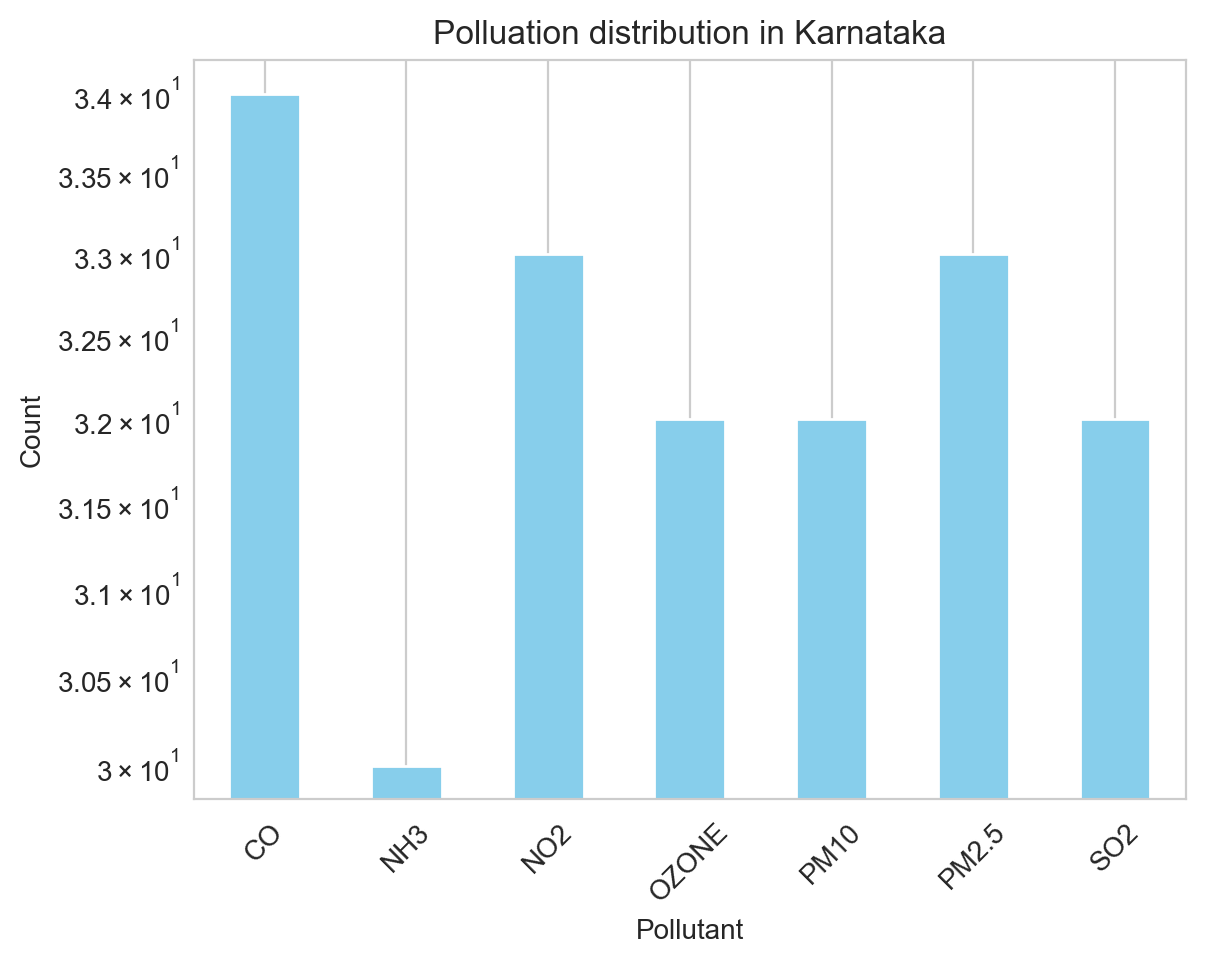

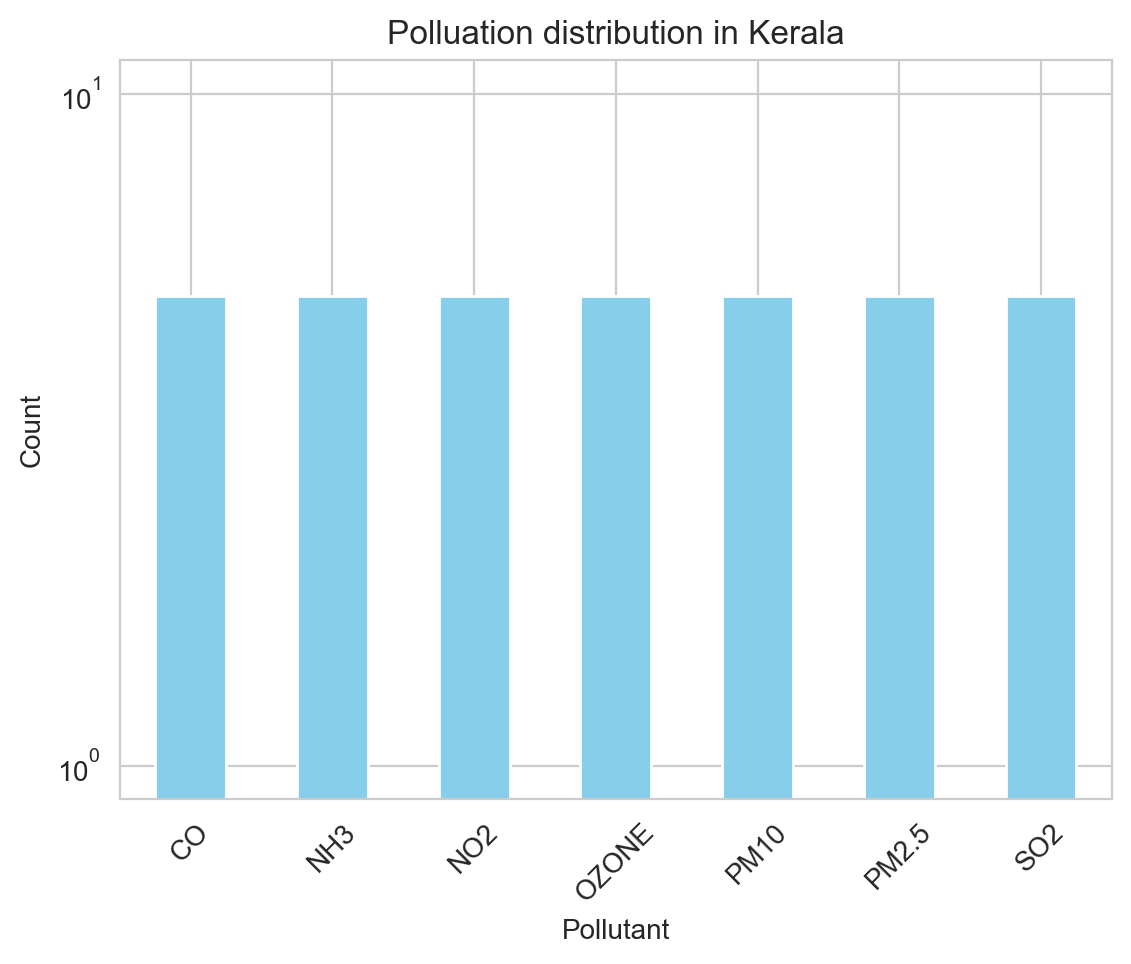

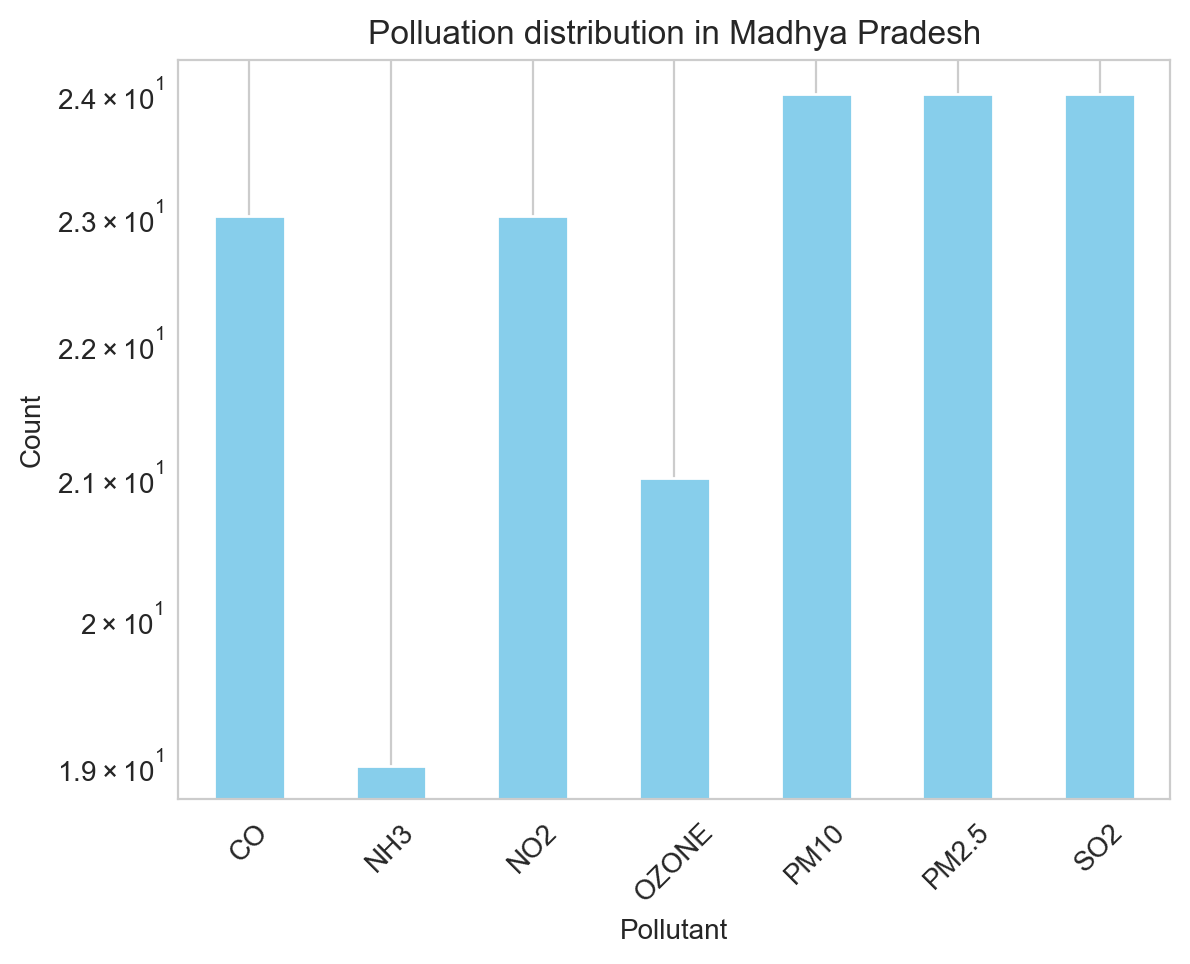

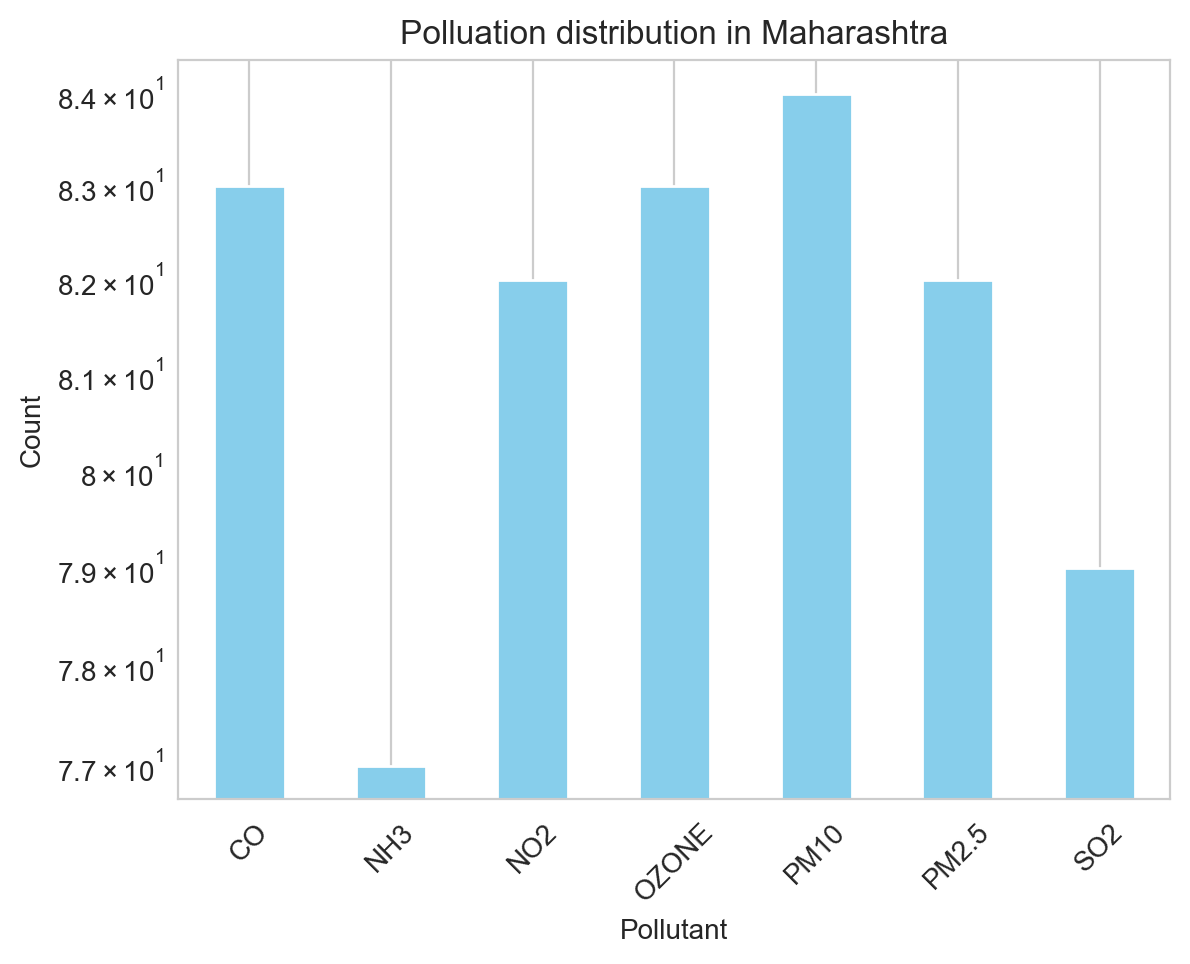

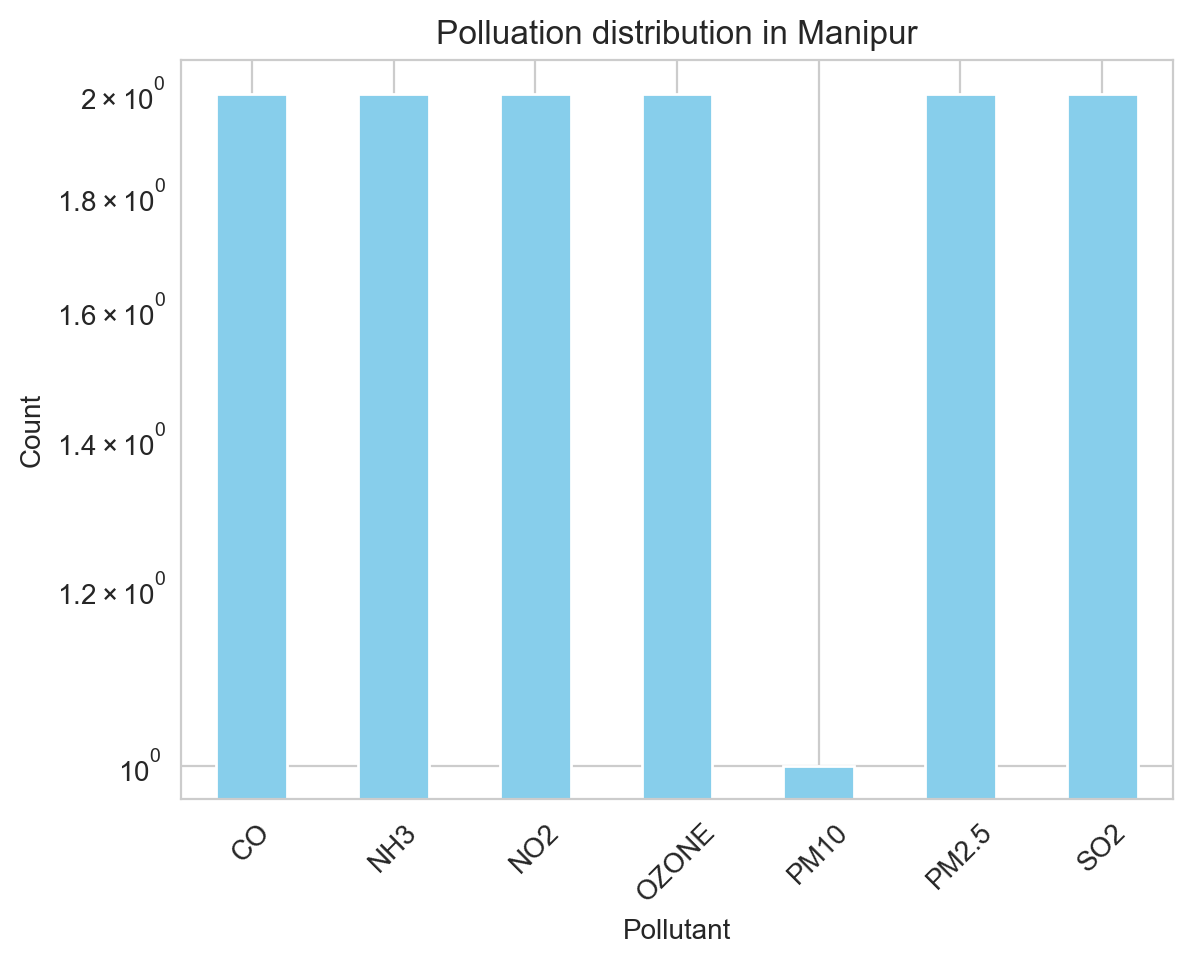

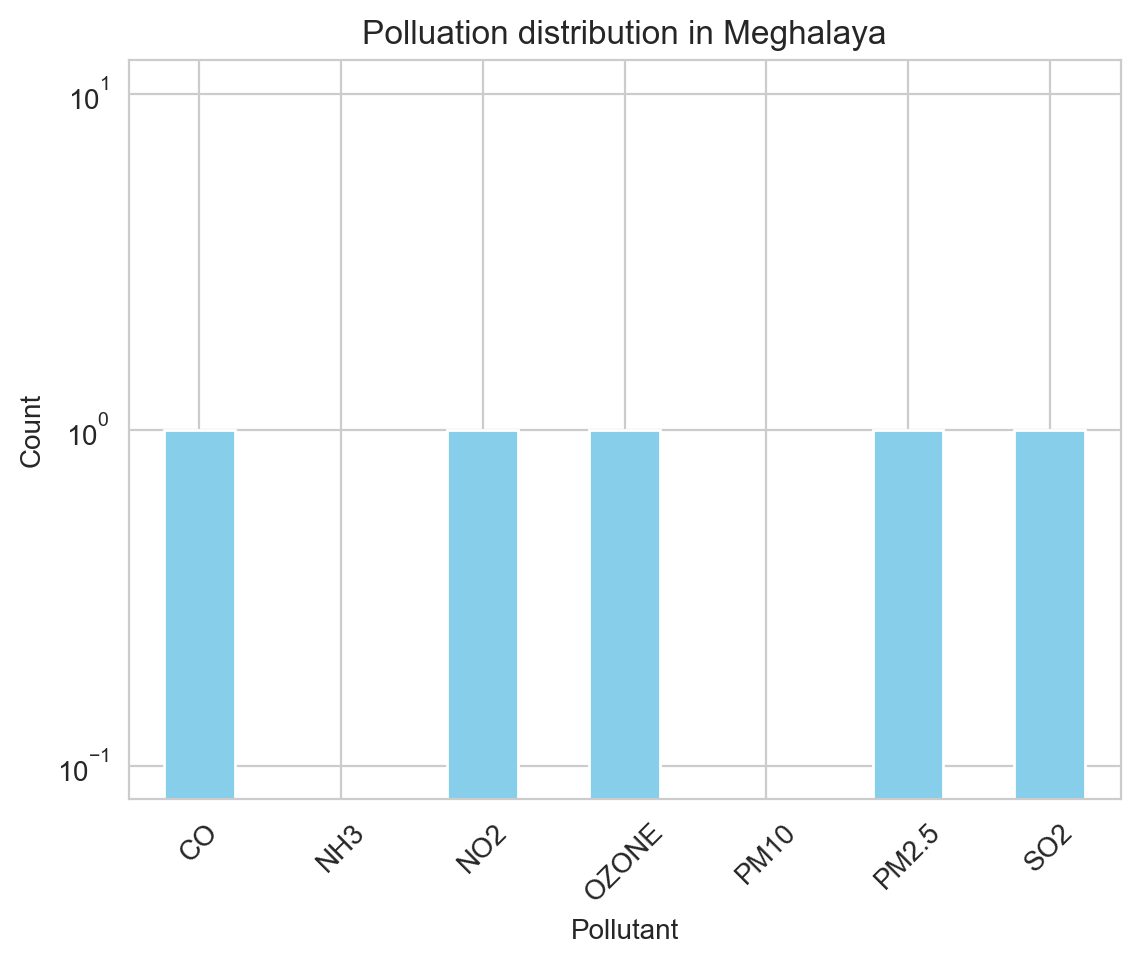

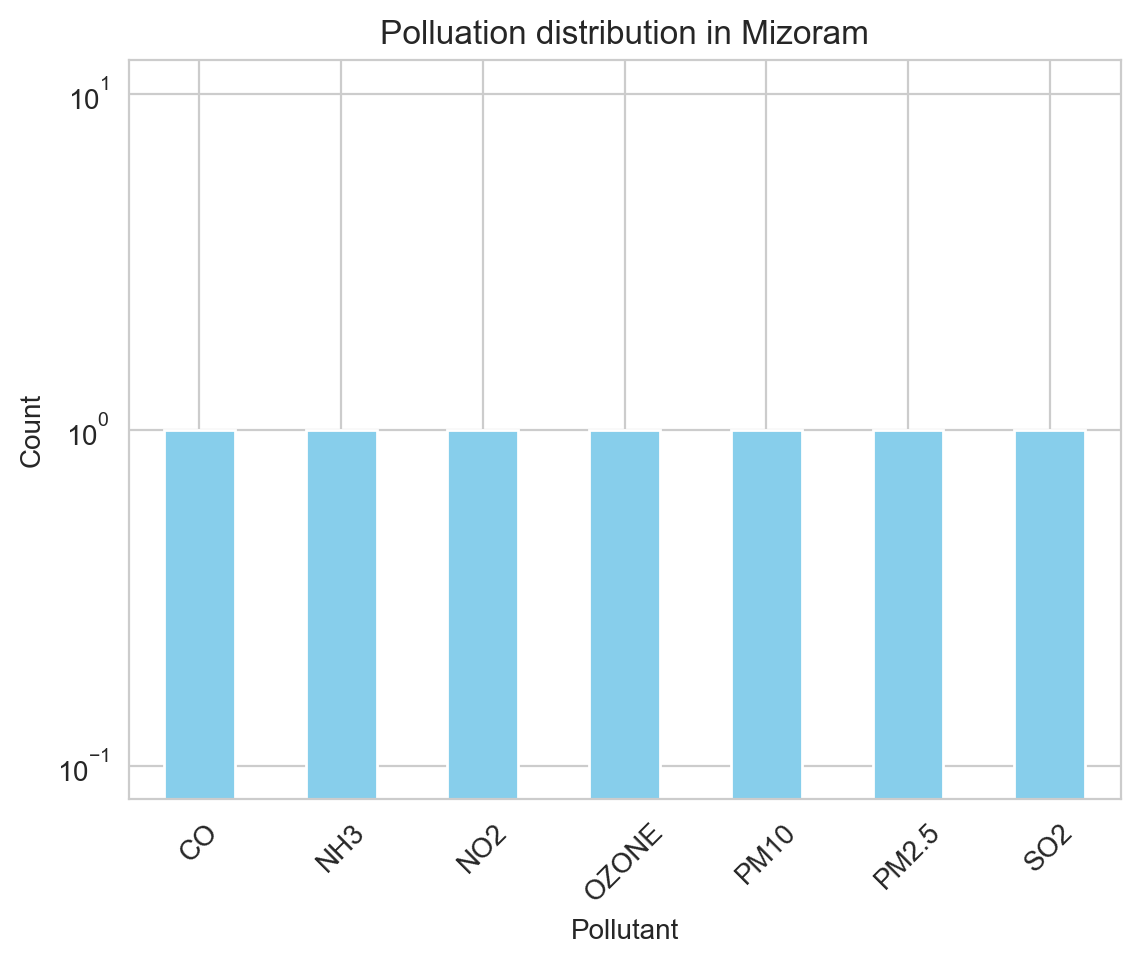

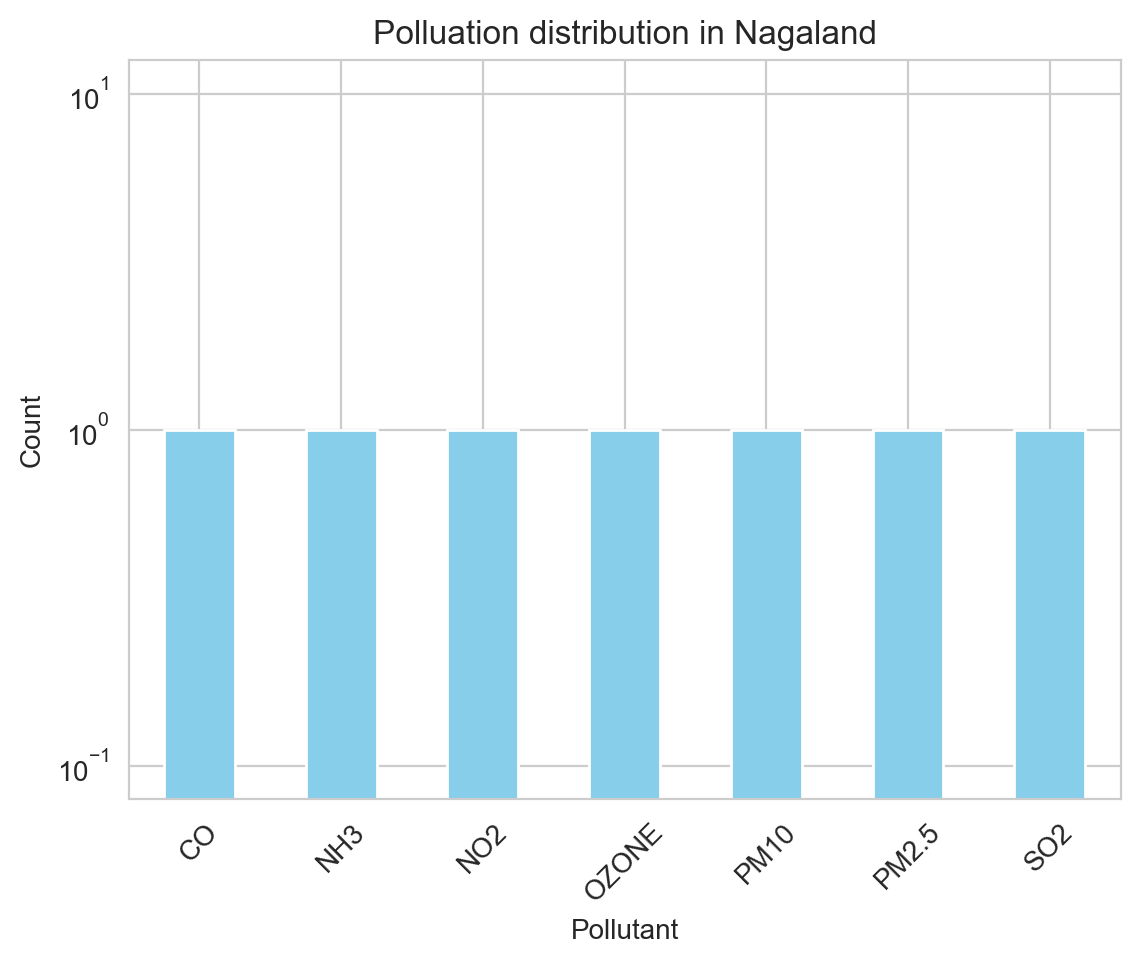

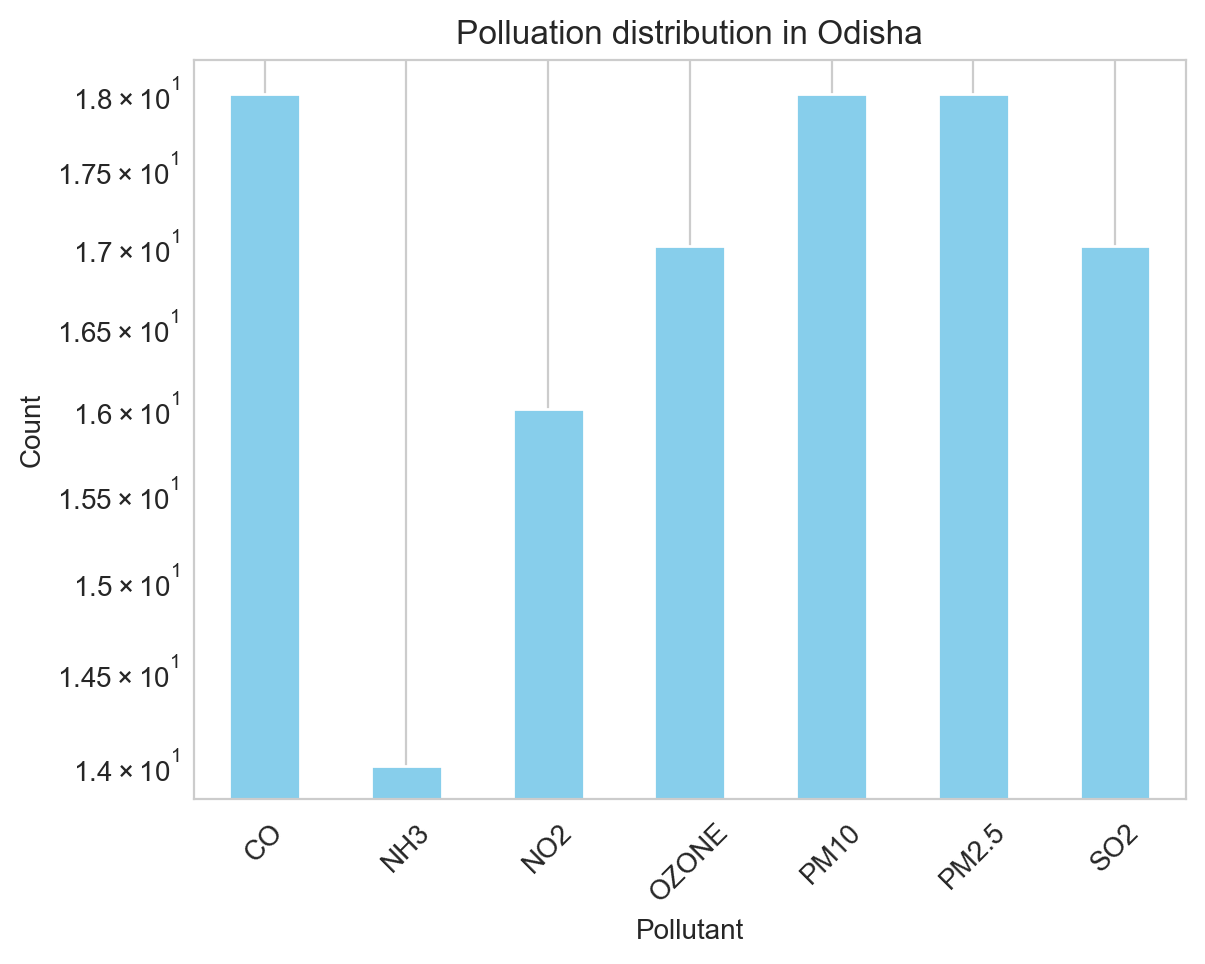

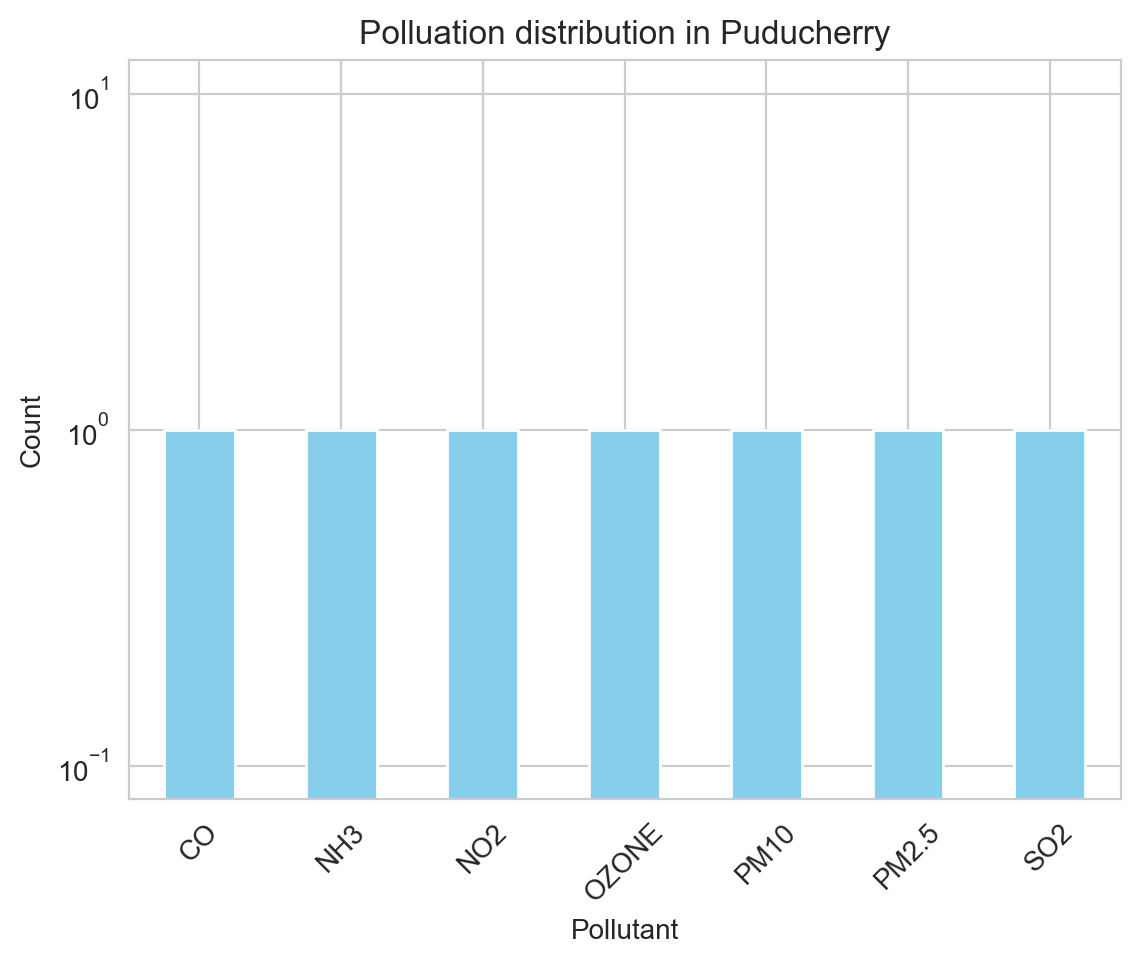

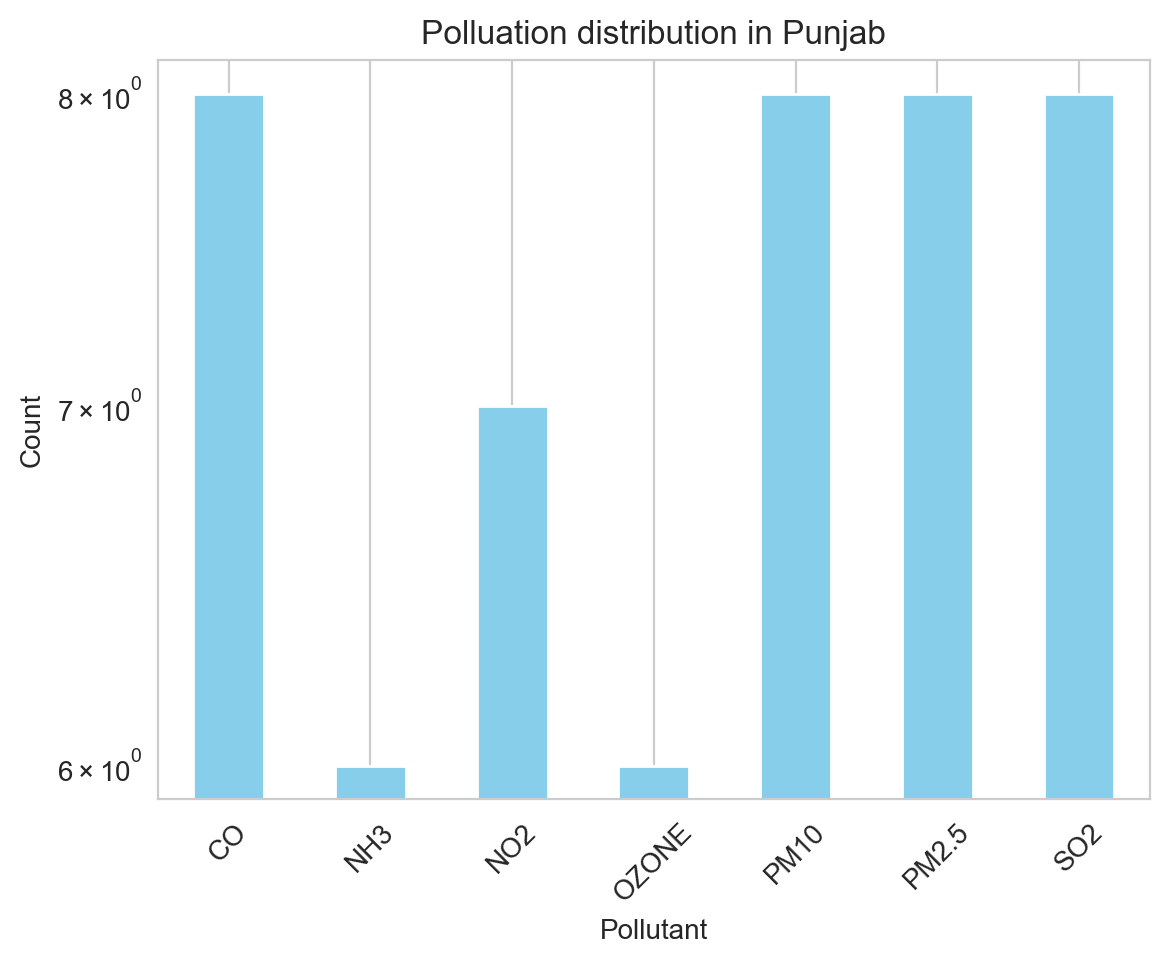

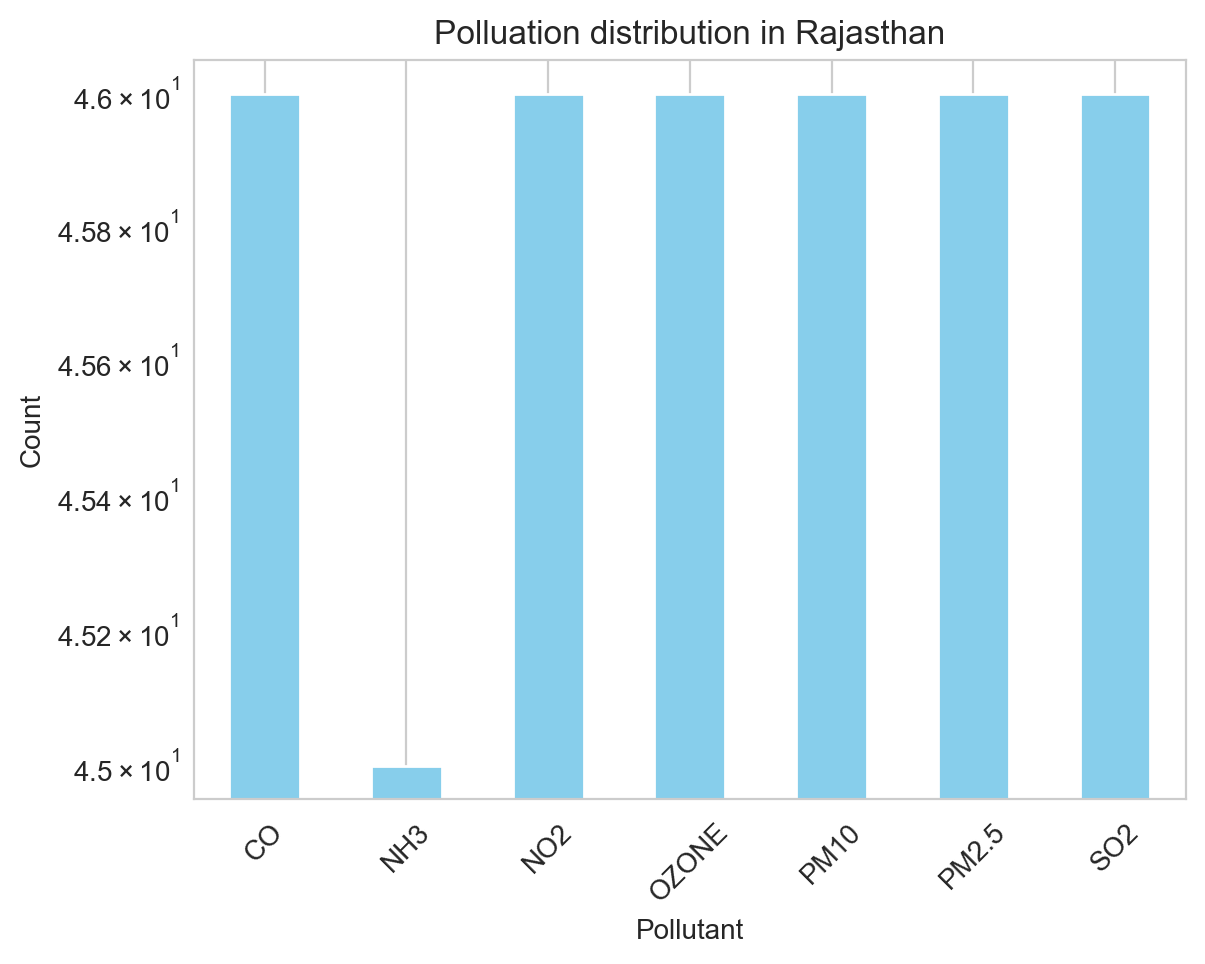

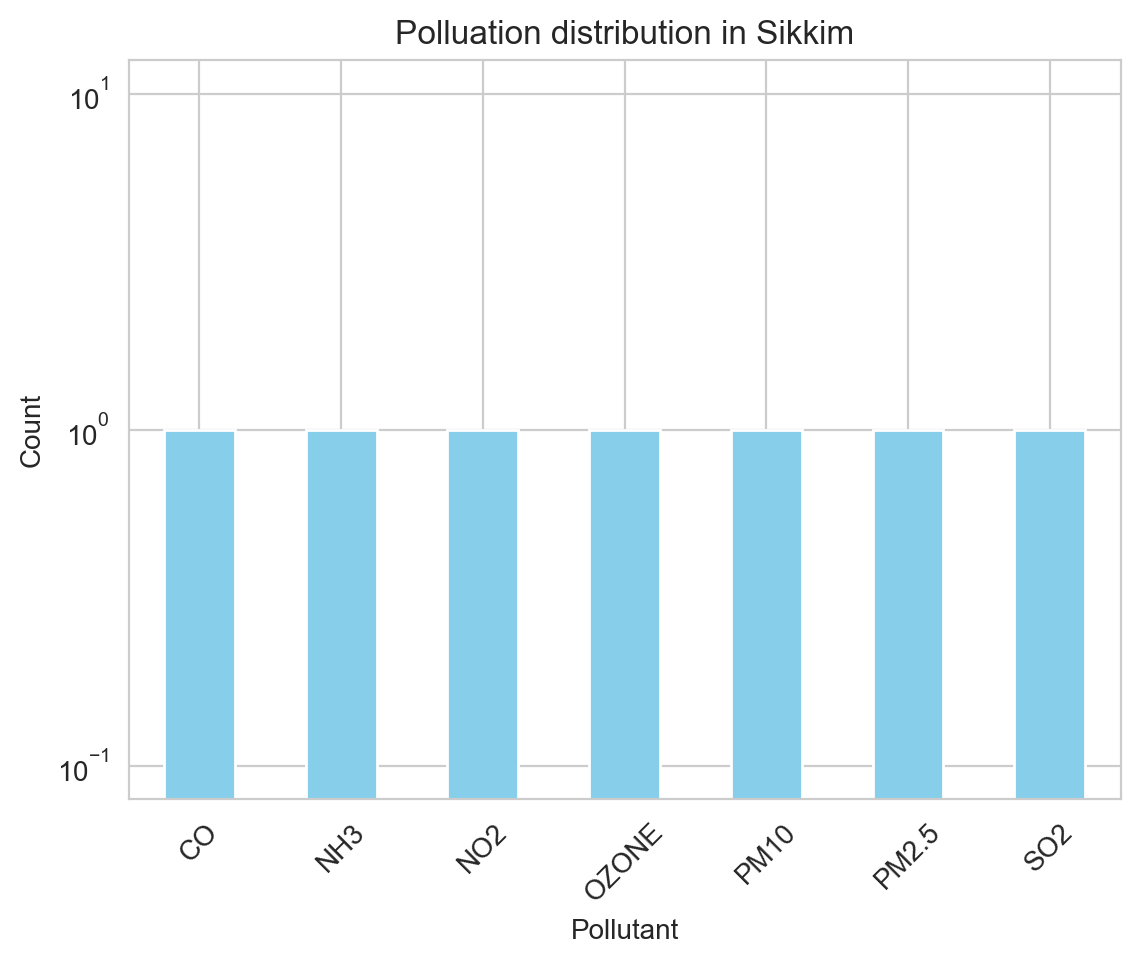

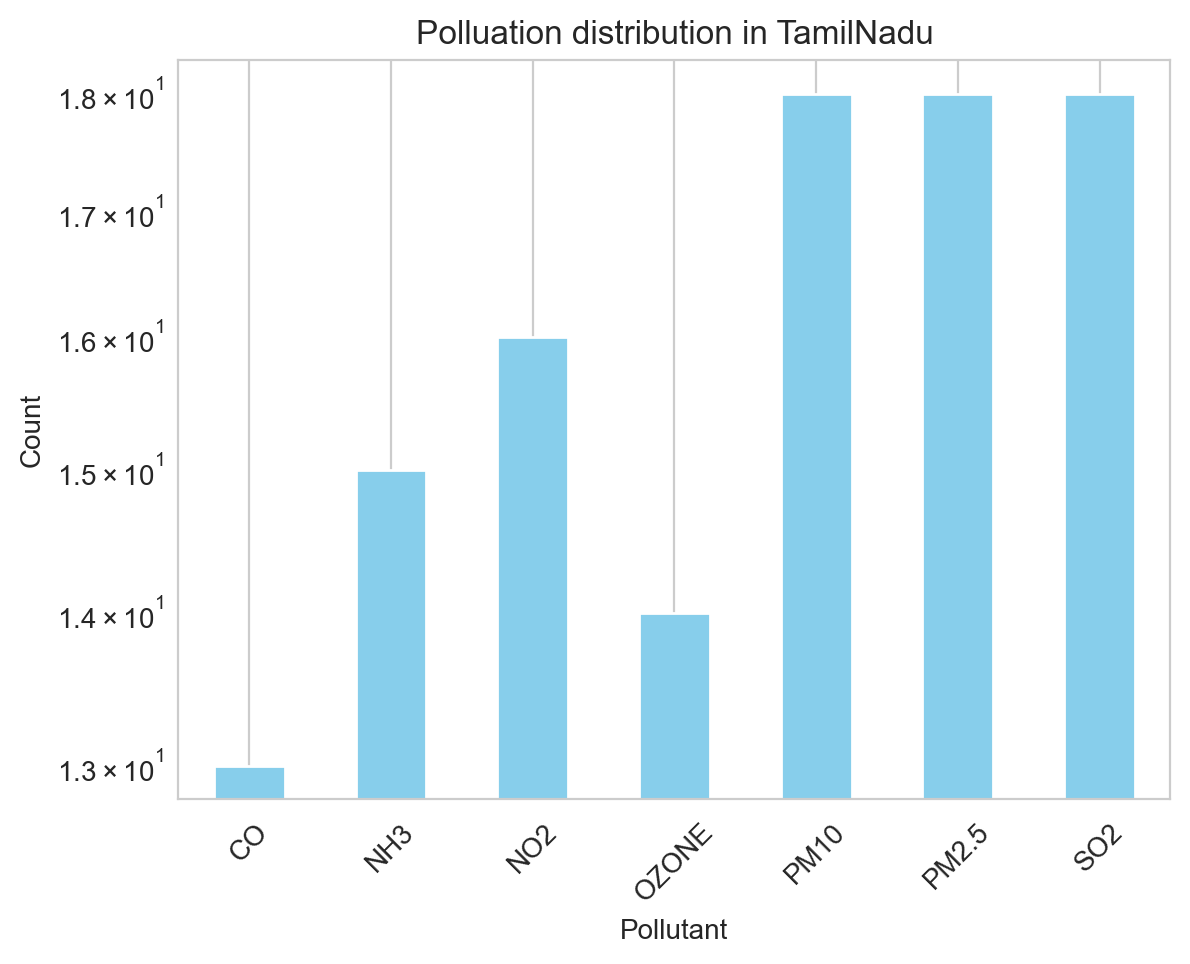

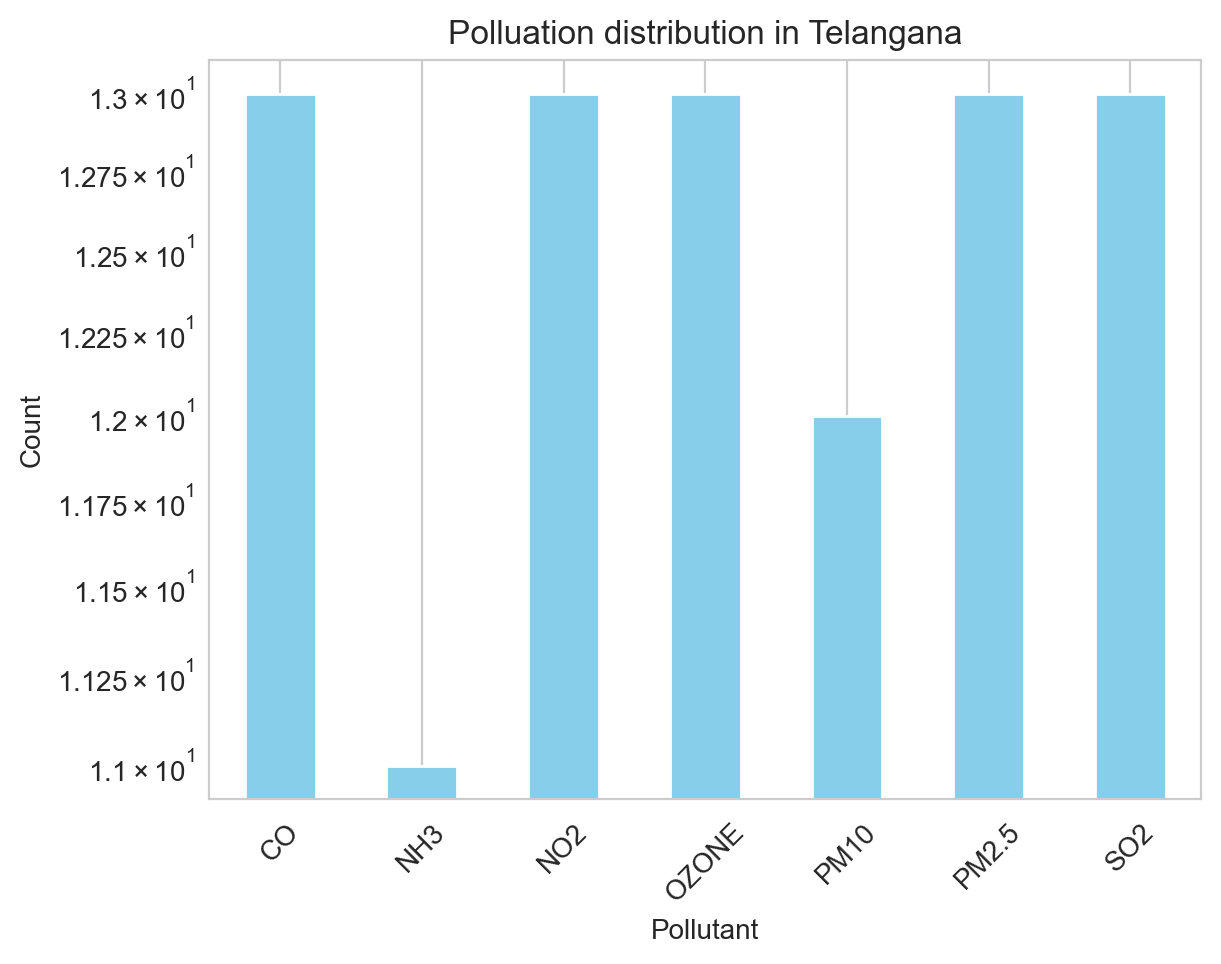

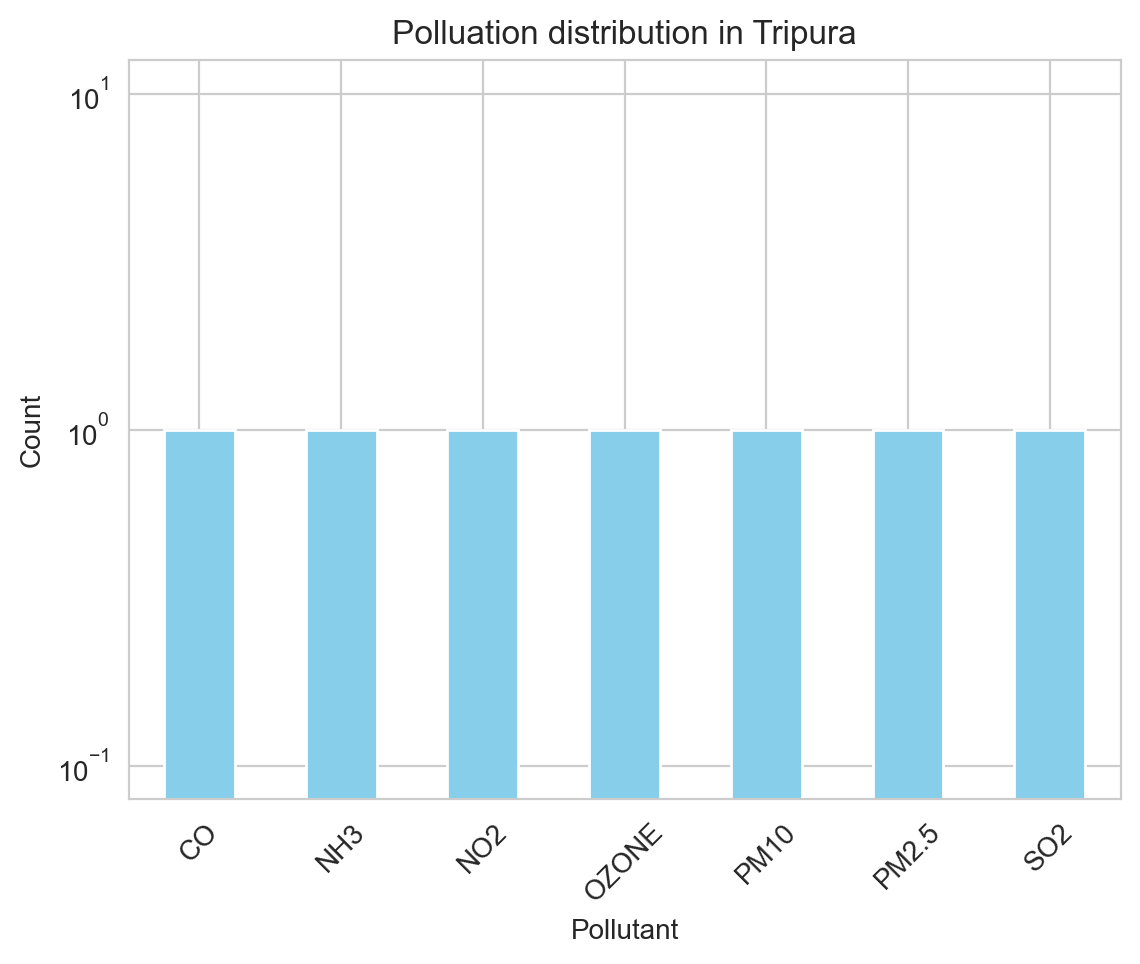

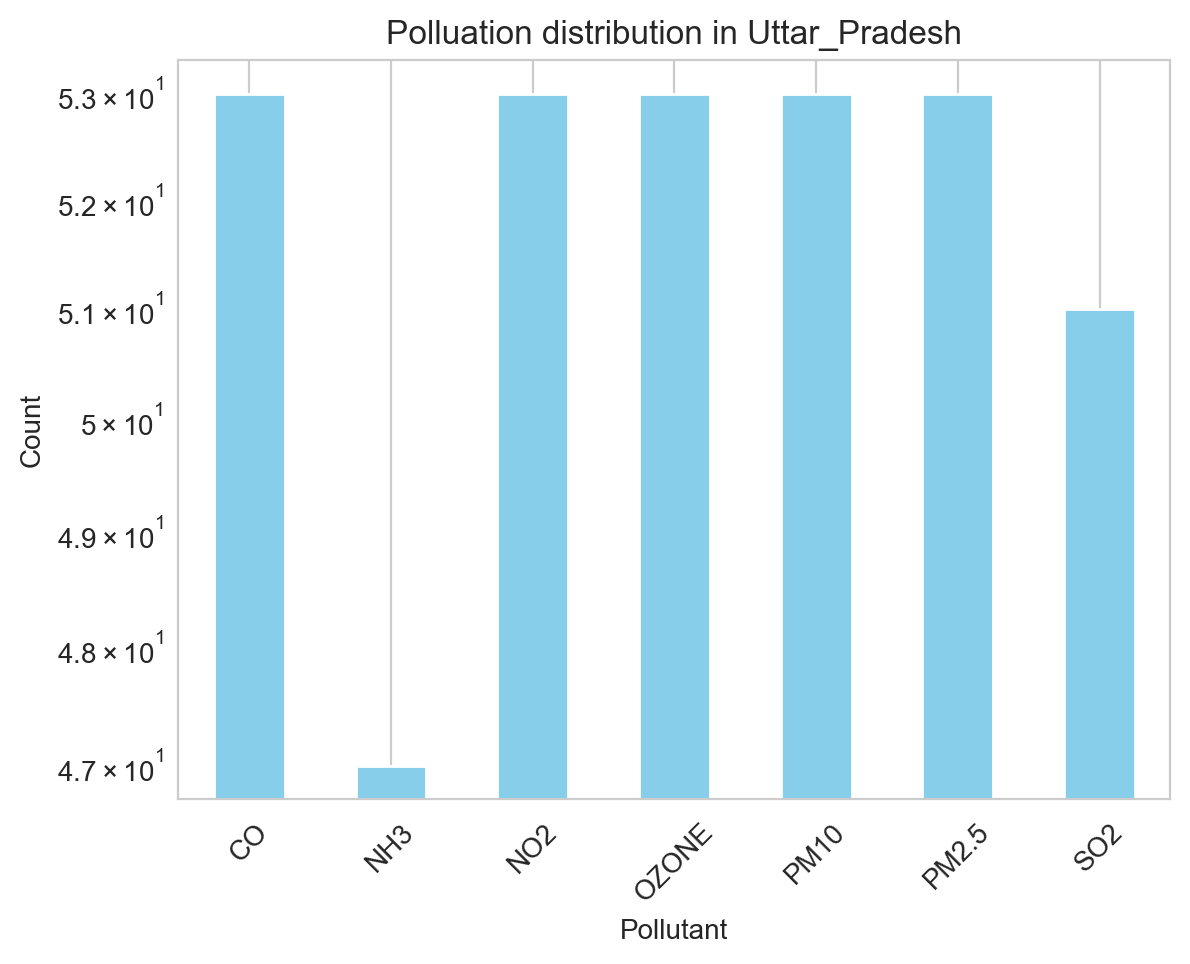

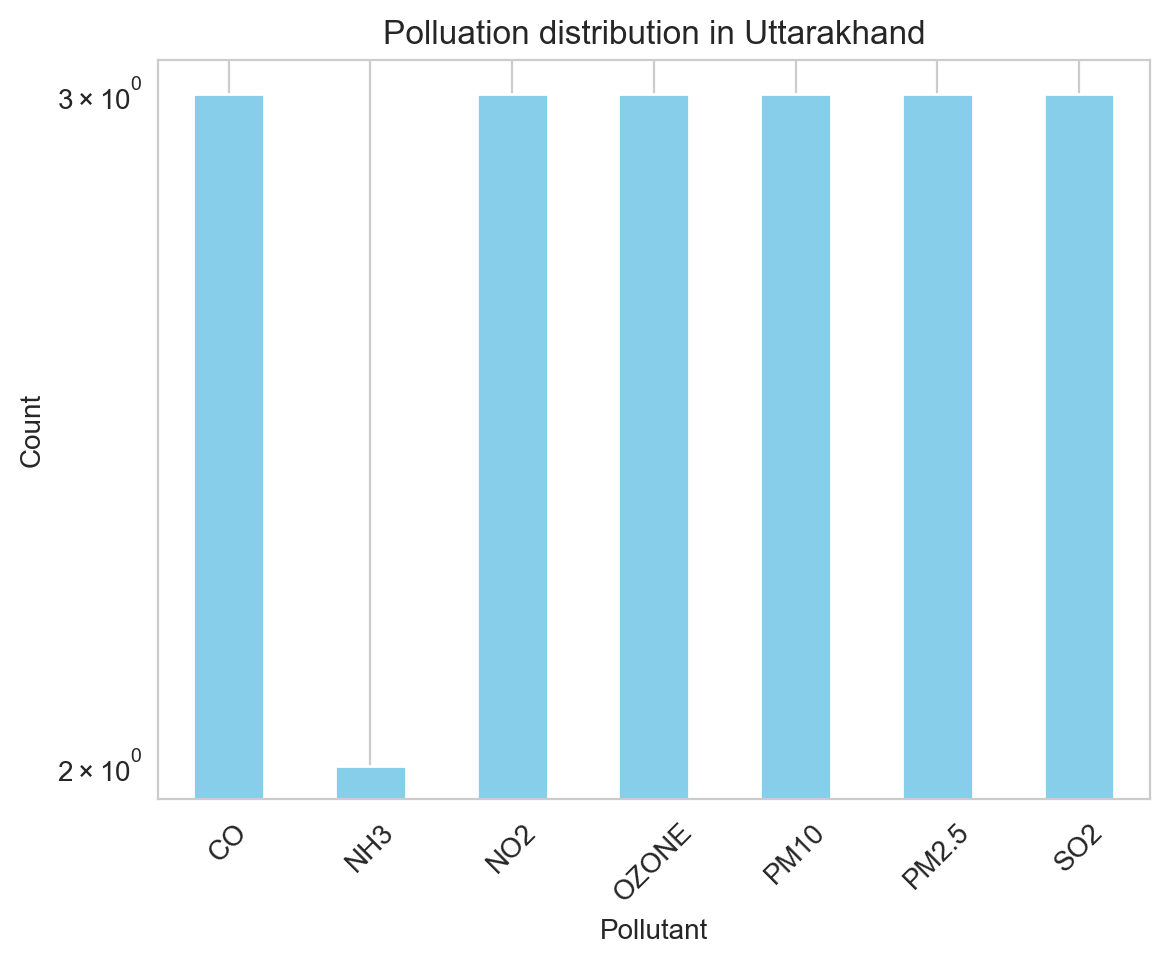

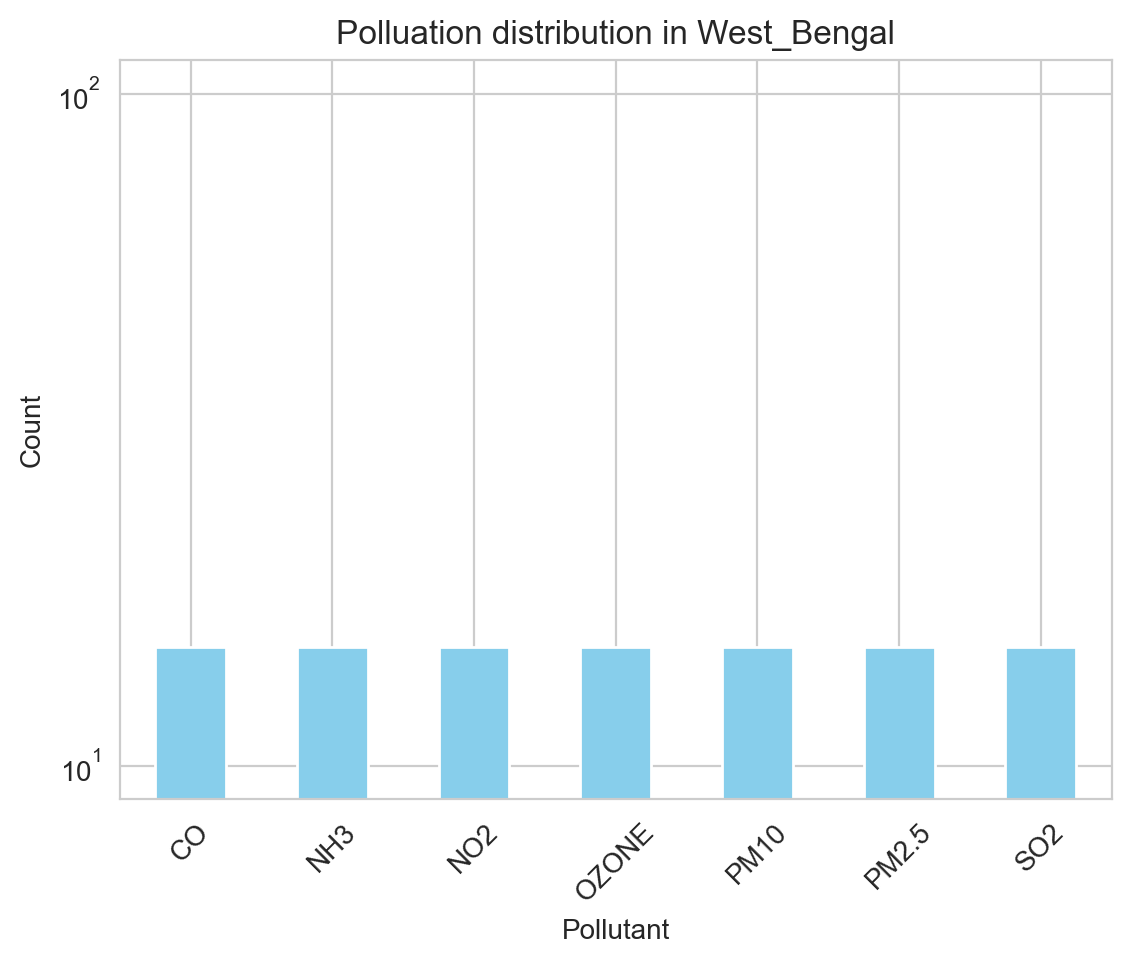

In [35]:
# group data by state and pollutant for getting the occurrence count
state_pollution = df.groupby(['state','pollutant_id'])\
                    .size().unstack(fill_value=0)
                    
# plotting a bar chart for each state
for state in state_pollution.index:
    state_pollution.loc[state].plot(kind='bar', color='skyblue')
    plt.title(f'Polluation distribution in {state}')
    plt.xlabel('Pollutant')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.xticks(rotation= 45)
    plt.show()

__Based on the bar plots above, we can infer that__

1. **Andhra Pradesh:**
   - High Values: PM10, PM2.5, SO2.
   - Explanation: Andhra Pradesh shows relatively high values for particulate matter (PM10 and PM2.5) and sulfur dioxide (SO2), which could be attributed to industrial activities, vehicular emissions, and agricultural practices in the region.

2. **Arunachal Pradesh:**
   - Low Values: CO, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Arunachal Pradesh has lower levels of most pollutants, which might be due to its sparse population, limited industrialization, and abundant green cover, resulting in lower emissions.

3. **Assam:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Assam exhibits higher levels of carbon monoxide (CO), nitrogen dioxide (NO2), and particulate matter (PM10 and PM2.5), possibly due to urbanization, vehicular pollution, and industrial activities in densely populated areas.

4. **Bihar:**
   - High Values: CO, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Bihar shows elevated levels of various pollutants, likely attributed to rapid urbanization, industrial growth, agricultural burning, and vehicular emissions, leading to poor air quality in the region.

5. **Chandigarh:**
   - Balanced Values: No extreme highs or lows observed.
   - Explanation: Chandigarh, being a union territory and a planned city, exhibits relatively balanced pollutant levels, reflecting effective urban planning and pollution control measures.

6. **Chhattisgarh:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Chhattisgarh shows elevated levels of various pollutants, primarily due to its significant industrial presence, coal mining activities, and biomass burning, contributing to air pollution in the state.

7. **Delhi:**
   - High Values: CO, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Delhi, the national capital region, experiences severe air pollution levels, particularly high in carbon monoxide (CO), nitrogen dioxide (NO2), ozone (O3), and particulate matter (PM10 and PM2.5), primarily due to vehicular emissions, industrial activities, and construction dust.

8. **Gujarat:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Gujarat exhibits elevated levels of various pollutants, attributed to its industrialization, extensive petrochemical complexes, thermal power plants, and vehicular emissions, contributing to air pollution in the state.

9. **Haryana:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Haryana shows high levels of various pollutants, influenced by its industrial zones, agricultural activities, urbanization, and proximity to the national capital region, contributing to poor air quality in the state.

10. **Himachal Pradesh:**
    - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
    - Explanation: Himachal Pradesh exhibits relatively lower levels of pollutants, owing to its mountainous terrain, sparse population, and lesser industrialization compared to other states, resulting in cleaner air quality.

1. **Jharkhand:**
   - Balanced Values: CO, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Jharkhand exhibits relatively balanced pollutant levels across all categories, indicating a mix of industrial, urban, and rural areas with moderate pollution levels.

2. **Karnataka:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Karnataka shows elevated levels of carbon monoxide (CO), nitrogen dioxide (NO2), particulate matter (PM10 and PM2.5), and sulfur dioxide (SO2), possibly due to urbanization, industrialization, and vehicular emissions in cities like Bengaluru and industrial regions.

3. **Kerala:**
   - Balanced Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Kerala exhibits relatively balanced pollutant levels across all categories, influenced by its geographical diversity, urbanization, and agricultural activities, resulting in moderate pollution levels across the state.

4. **Madhya Pradesh:**
   - High Values: CO, NO2, PM10, PM2.5, SO2.
   - Explanation: Madhya Pradesh shows elevated levels of various pollutants, attributed to its industrial growth, mining activities, vehicular emissions, and biomass burning, contributing to air pollution in urban and industrialized areas.

5. **Maharashtra:**
   - High Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Maharashtra exhibits high levels of most pollutants, particularly in urban and industrialized regions like Mumbai, Pune, and Nagpur, due to heavy industrialization, vehicular emissions, construction activities, and urban sprawl.

6. **Manipur:**
   - Low Values: CO, NH3, NO2, OZONE, PM2.5, SO2.
   - Explanation: Manipur shows relatively lower levels of pollutants, likely due to its sparse population, limited industrialization, and abundant green cover, resulting in cleaner air quality compared to more densely populated states.

7. **Meghalaya:**
   - Low Values: CO, NO2, OZONE, PM2.5, SO2.
   - Explanation: Meghalaya exhibits relatively lower levels of pollutants, attributed to its predominantly rural and forested landscape, limited industrialization, and lesser vehicular emissions compared to urbanized states.

8. **Mizoram:**
   - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Mizoram shows relatively lower levels of pollutants, likely due to its sparse population, pristine natural environment, and minimal industrialization, contributing to cleaner air quality in the state.

9. **Nagaland:**
   - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
   - Explanation: Nagaland exhibits relatively lower levels of pollutants, similar to other northeastern states, owing to its low population density, limited industrialization, and abundant green cover, resulting in cleaner air quality.

10. **Odisha:**
    - High Values: CO, NO2, PM10, PM2.5, SO2.
    - Explanation: Odisha shows elevated levels of various pollutants, primarily due to industrialization, mining activities, thermal power plants, vehicular emissions, and agricultural burning, contributing to air pollution in the state.

11. **Puducherry:**
      - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Puducherry exhibits relatively lower levels of pollutants across all categories, attributed to its smaller size, fewer industrial activities, and coastal location, leading to cleaner air quality compared to more industrialized states.

12. **Punjab:**
      - Balanced Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Punjab shows relatively balanced pollutant levels across all categories, influenced by a mix of agricultural activities, industrialization, and urbanization, resulting in moderate pollution levels across the state.

13. **Rajasthan:**
      - High Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Rajasthan exhibits high levels of most pollutants, attributed to its arid climate, extensive agricultural activities, industrialization, and urbanization, leading to elevated levels of air pollution across the state.

14. **Sikkim:**
      - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Sikkim shows relatively lower levels of pollutants, owing to its mountainous terrain, sparse population, and stringent environmental policies, contributing to cleaner air quality compared to more industrialized states.

15. **Tamil Nadu:**
      - High Values: CO, NO2, PM10, PM2.5, SO2.
      - Explanation: Tamil Nadu exhibits elevated levels of various pollutants, particularly in urban and industrialized regions like Chennai, Coimbatore, and Tirupur, due to industrial activities, vehicular emissions, and urbanization.

16. **Telangana:**
      - High Values: CO, NO2, PM10, PM2.5, SO2.
      - Explanation: Telangana shows elevated levels of various pollutants, primarily due to industrialization, urbanization, and agricultural activities, leading to poor air quality, especially in urban centers like Hyderabad.

17. **Tripura:**
      - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Tripura exhibits relatively lower levels of pollutants, likely due to its smaller population, limited industrialization, and abundant green cover, contributing to cleaner air quality compared to more densely populated states.

18. **Uttar Pradesh:**
      - High Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Uttar Pradesh shows elevated levels of most pollutants, attributed to rapid urbanization, industrial growth, agricultural practices, vehicular emissions, and biomass burning, leading to severe air pollution in the state.

19. **Uttarakhand:**
      - Low Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: Uttarakhand exhibits relatively lower levels of pollutants, owing to its mountainous terrain, limited industrialization, and strict environmental regulations, contributing to cleaner air quality compared to more industrialized states.

20. **West Bengal:**
      - Balanced Values: CO, NH3, NO2, OZONE, PM10, PM2.5, SO2.
      - Explanation: West Bengal shows relatively balanced pollutant levels across all categories, influenced by a mix of industrialization, urbanization, and agricultural activities, resulting in moderate pollution levels across the state.